# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import plotly.express as px
from pandas_profiling import ProfileReport

pd.options.display.float_format = '{:.0f}'.format

In [2]:
startDate = '1992-01-01'

In [3]:
def formatDates(data, position):
    dates = []
    for index, row in data.iterrows():
        dates.append(str(row[position])[:8] + '01')
    return dates

def resampleMonthly(data, dateColumn, dateLocation, on, method):
    df = data.resample('M', on=on).mean().interpolate(method=method)
    df.reset_index(inplace=True)
    df[dateColumn] = formatDates(df, dateLocation)
    df[dateColumn] = pd.to_datetime(df[dateColumn])
    df.sort_values(dateColumn, inplace=True)
    df.set_index(dateColumn,inplace=True)
    return df

# All EU Dataset

In [4]:
EUdata = pd.read_csv('data/apro_mt_pwgtm_1_Data.csv')
EUdata = EUdata[EUdata['UNIT'] == 'Thousand tonnes']
EUdata = EUdata[['TIME', 'GEO', 'MEAT', 'Value']]
EUdata.columns = ['Date', 'Country', 'Meat', 'Value']
#EUdata = EUdata[(EUdata.Meat == 'Bovine meat') | (EUdata.Meat == 'Pigmeat')]
EUdata = EUdata[EUdata.Meat == 'Bovine meat']

EUdata.Date = pd.to_datetime(EUdata.Date, format='%YM%m')
EUdata = EUdata[EUdata.Date >= startDate]

EUdata['Country'] = EUdata['Country'].str.slice(0,7)
EUdata = EUdata.replace([':'], 0, regex=True)
EUdata['Value'] = EUdata['Value'].astype(float)

EUdata.reset_index(inplace=True, drop=True)

EUdata

Date  Country         Meat  Value
0   1992-01-01  Germany  Bovine meat    159
1   1992-01-01  Ireland  Bovine meat     35
2   1992-02-01  Germany  Bovine meat    140
3   1992-02-01  Ireland  Bovine meat     32
4   1992-03-01  Germany  Bovine meat    165
..         ...      ...          ...    ...
721 2022-01-01  Ireland  Bovine meat     47
722 2022-02-01  Germany  Bovine meat     78
723 2022-02-01  Ireland  Bovine meat     50
724 2022-03-01  Germany  Bovine meat      0
725 2022-03-01  Ireland  Bovine meat     53

[726 rows x 4 columns]

In [5]:
EUdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     726 non-null    datetime64[ns]
 1   Country  726 non-null    object        
 2   Meat     726 non-null    object        
 3   Value    726 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 22.8+ KB


# Ireland Slaughter Data

In [6]:
irelandData = EUdata[EUdata['Country'] == 'Ireland'].reset_index(drop=True)
irelandData = irelandData.pivot_table(index='Date', columns='Meat', values='Value')
irelandData.reset_index(inplace=True)
irelandData.set_index('Date',inplace=True)
#irelandData.columns = ['Ireland Bovine Meat', 'Pig Meat']
irelandData.columns = ['Ireland Bovine Meat']
irelandData

Ireland Bovine Meat
Date                           
1992-01-01                   35
1992-02-01                   32
1992-03-01                   47
1992-04-01                   40
1992-05-01                   34
...                         ...
2021-11-01                   56
2021-12-01                   46
2022-01-01                   47
2022-02-01                   50
2022-03-01                   53

[363 rows x 1 columns]

## Ireland Data NaN Count

In [7]:
irelandData.isna().sum()

Ireland Bovine Meat    0
dtype: int64

## Ireland Data Box Plot

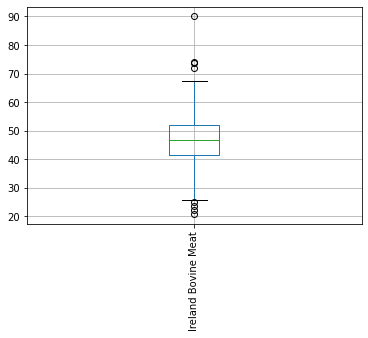

In [8]:
irelandData.boxplot(rot=90);

In [9]:
#https://plotly.com/python/box-plots/
fig = px.box(irelandData)
fig.show()

In [10]:
fig = px.box(irelandData, points='all')
fig.show()

## Ireland Slaughter Plot

In [11]:
fig = px.line(irelandData, labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Ireland', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Ireland Slaughter Growth Plot

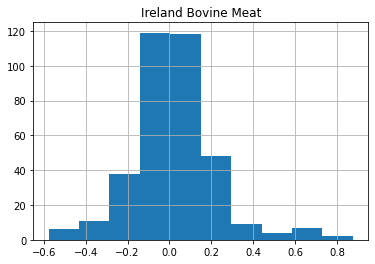

In [12]:
irelandData.pct_change().hist();

In [13]:
fig = px.line(irelandData.pct_change(), labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Ireland', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

In [14]:
fig = px.line(irelandData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Ireland', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

# Germany Slaughter Data

In [15]:
germanData = EUdata[EUdata['Country'] == 'Germany'].reset_index(drop=True)
germanData = germanData.pivot_table(index='Date', columns='Meat', values='Value')
germanData.reset_index(inplace=True)
germanData.set_index('Date',inplace=True)
#germanData.columns = ['Germany Bovine Meat', 'Pig Meat']
germanData.columns = ['Germany Bovine Meat']

germanData

Germany Bovine Meat
Date                           
1992-01-01                  159
1992-02-01                  140
1992-03-01                  165
1992-04-01                  156
1992-05-01                  145
...                         ...
2021-11-01                  104
2021-12-01                   91
2022-01-01                   77
2022-02-01                   78
2022-03-01                    0

[363 rows x 1 columns]

## Germany NaN Count

In [16]:
germanData.isna().sum()

Germany Bovine Meat    0
dtype: int64

## Germany Data Box Plot

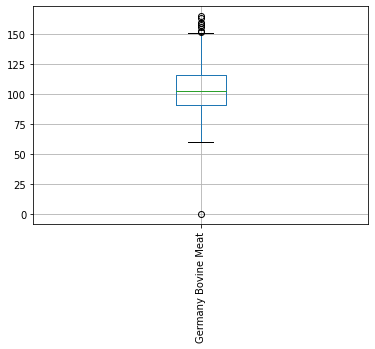

In [17]:
germanData.boxplot(rot=90);

In [18]:
#https://plotly.com/python/box-plots/
fig = px.box(germanData)
fig.show()

In [19]:
fig = px.box(germanData, points='all')
fig.show()

## Germany Slaughter Plot

In [20]:
fig = px.line(germanData, labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Germany Slaughter Growth Plot

In [21]:
fig = px.line(germanData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

# USA Slaughter Data

In [22]:
usaData = pd.read_excel('data/MeatStatsFullUSA.xlsx', sheet_name='SlaughterWeights-Full',
                   skiprows=2)
dates = usaData.iloc[:,0]

usaData = usaData.iloc[:, 13:]
usaData.insert(loc=0, column='Date', value=dates)
usaData.drop(usaData.head(2).index, inplace=True)
usaData.drop(usaData.tail(6).index, inplace=True)
usaData.Date = pd.to_datetime(usaData.Date, format='%b-%Y')
usaData = usaData[usaData.Date >= startDate].reset_index(drop=True)
usaData.index = usaData.Date
usaData.drop(columns='Date', inplace=True)

usaData['USA Bovine Meat'] = usaData['Cattle.2'] + usaData['Calves.2']
#usaData['USA Pig Meat'] = usaData['Hogs.2']
#usaData = usaData[['USA Bovine Meat', 'USA Pig Meat']]
usaData = usaData[['USA Bovine Meat']]
usaData

USA Bovine Meat
Date                       
2022-03-01              987
2022-02-01              981
2022-01-01              985
2021-12-01              977
2021-11-01              976
...                     ...
1992-05-01              934
1992-04-01              928
1992-03-01              927
1992-02-01              929
1992-01-01              921

[363 rows x 1 columns]

In [23]:
#https://plotly.com/python/box-plots/
fig = px.box(usaData)
fig.show()

## Convert USA Data to Tonne

In [24]:
#usaData = (usaData * 1000) / 2204.6 
usaData = usaData / 0.453592
usaData

USA Bovine Meat
Date                       
2022-03-01             2176
2022-02-01             2163
2022-01-01             2172
2021-12-01             2154
2021-11-01             2152
...                     ...
1992-05-01             2059
1992-04-01             2046
1992-03-01             2044
1992-02-01             2048
1992-01-01             2030

[363 rows x 1 columns]

## USA Slaughter Plot

In [25]:
fig = px.line(usaData, labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings USA', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## USA Slaughter Growth Plot

In [26]:
fig = px.line(usaData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth USA', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

# Economic Data Import

## Population Data

### Ireland Population Data

In [27]:
irelandPop = pd.read_csv('data/POPTOTIEA647NWDB.csv', 
                         parse_dates=['DATE'])
irelandPop.columns = ['Date','Ireland Population']
irelandPop = irelandPop[irelandPop.Date >= startDate]

irelandPop = resampleMonthly(irelandPop, 'Date', 0, 'Date', 'linear')

### Germany Population Data

In [28]:
germanyPop = pd.read_csv('data/POPTOTDEA647NWDB.csv',
                    parse_dates=['DATE'])
germanyPop.columns = ['Date','German Population']
germanyPop = germanyPop[germanyPop.Date >= startDate]
germanyPop = resampleMonthly(germanyPop, 'Date', 0, 'Date', 'linear')
germanyPop

German Population
Date                         
1992-01-01           80624598
1992-02-01           80668912
1992-03-01           80713226
1992-04-01           80757539
1992-05-01           80801853
...                       ...
2019-09-01           83191337
2019-10-01           83203634
2019-11-01           83215931
2019-12-01           83228228
2020-01-01           83240525

[337 rows x 1 columns]

### USA Population Data

In [29]:
usaPop = pd.read_csv('data/POPTOTUSA647NWDB.csv',
                    parse_dates=['DATE'])
usaPop.columns = ['Date','USA Population']
usaPop = usaPop[usaPop.Date >= startDate]
usaPop = resampleMonthly(usaPop, 'Date', 0, 'Date', 'linear')

## GDP

In [30]:
ecoData = pd.read_csv('data/worldBankData.csv', skiprows=4)
ecoData = ecoData[(ecoData['Indicator Name'] == 'GDP (constant LCU)') |
                 (ecoData['Indicator Name'] == 'GDP per capita (current LCU)')].reset_index(drop=True)
ecoData = ecoData.melt(id_vars=['Country Name', 'Indicator Name', 'Indicator Code', 'Country Code'],
                   var_name='Year', value_name='Total')
ecoData.Year = pd.to_datetime(ecoData.Year)
ecoData = ecoData[ecoData.Year >= startDate].reset_index(drop=True)
ecoData = ecoData[['Country Name', 'Indicator Name', 'Year', 'Total']]
ecoData

Country Name                Indicator Name       Year         Total
0          Germany  GDP per capita (current LCU) 1992-01-01         21111
1          Germany            GDP (constant LCU) 1992-01-01 2261460000000
2          Ireland  GDP per capita (current LCU) 1992-01-01         11728
3          Ireland            GDP (constant LCU) 1992-01-01   76486482000
4    United States  GDP per capita (current LCU) 1992-01-01         25419
..             ...                           ...        ...           ...
175        Germany            GDP (constant LCU) 2021-01-01           NaN
176        Ireland  GDP per capita (current LCU) 2021-01-01           NaN
177        Ireland            GDP (constant LCU) 2021-01-01           NaN
178  United States  GDP per capita (current LCU) 2021-01-01           NaN
179  United States            GDP (constant LCU) 2021-01-01           NaN

[180 rows x 4 columns]

### Ireland GDP

In [31]:
irelandGDP = ecoData[ecoData['Country Name'] == 'Ireland']
irelandGDP = irelandGDP.pivot_table(index='Year', columns='Indicator Name', values='Total')
irelandGDP.columns = ['Ireland GDP', 'Ireland GDP Per Capita']
irelandGDP.reset_index(inplace=True)

irelandGDP = resampleMonthly(irelandGDP, 'Year', 0, 'Year', 'linear')
irelandGDP

Ireland GDP  Ireland GDP Per Capita
Year                                           
1992-01-01  76486482000                   11728
1992-02-01  76658105500                   11801
1992-03-01  76829729000                   11874
1992-04-01  77001352500                   11947
1992-05-01  77172976000                   12020
...                 ...                     ...
2019-09-01 347254666667                   73943
2019-10-01 348888500000                   74155
2019-11-01 350522333333                   74366
2019-12-01 352156166667                   74577
2020-01-01 353790000000                   74788

[337 rows x 2 columns]

### Germany GDP

In [32]:
germanyGDP = ecoData[ecoData['Country Name'] == 'Germany']
germanyGDP = germanyGDP.pivot_table(index='Year', columns='Indicator Name', values='Total')
germanyGDP.columns = ['Germany GDP', 'Germany GDP Per Capita']
germanyGDP.reset_index(inplace=True)

germanyGDP = resampleMonthly(germanyGDP, 'Year', 0, 'Year', 'linear')
germanyGDP

Germany GDP  Germany GDP Per Capita
Year                                            
1992-01-01 2261460000000                   21111
1992-02-01 2259619166667                   21150
1992-03-01 2257778333333                   21188
1992-04-01 2255937500000                   21227
1992-05-01 2254096666667                   21265
...                  ...                     ...
2019-09-01 3146116666667                   40930
2019-10-01 3133760000000                   40821
2019-11-01 3121403333333                   40712
2019-12-01 3109046666667                   40603
2020-01-01 3096690000000                   40495

[337 rows x 2 columns]

### USA GDP

In [33]:
usaGDP = ecoData[ecoData['Country Name'] == 'United States']
usaGDP = usaGDP.pivot_table(index='Year', columns='Indicator Name', values='Total')
usaGDP.columns = ['USA GDP', 'USA GDP Per Capita']
usaGDP.reset_index(inplace=True)

usaGDP = resampleMonthly(usaGDP, 'Year', 0, 'Year', 'linear')
usaGDP

USA GDP  USA GDP Per Capita
Year                                         
1992-01-01 10139200000000               25419
1992-02-01 10162450000000               25500
1992-03-01 10185700000000               25580
1992-04-01 10208950000000               25661
1992-05-01 10232200000000               25742
...                   ...                 ...
2019-09-01 19521166666667               63898
2019-10-01 19464500000000               63725
2019-11-01 19407833333333               63552
2019-12-01 19351166666667               63379
2020-01-01 19294500000000               63207

[337 rows x 2 columns]

## Trade

In [34]:
trade = pd.read_csv('data/FAOSTAT_data_5-6-2022ImportsExports.csv')
trade = trade[['Area', 'Element', 'Item','Year','Unit', 'Value']]
trade = trade[(trade.Item == 'Meat, cattle') & (trade.Unit == 'tonnes')]

### Ireland Trade

In [35]:
irelandTrade = trade[trade.Area == 'Ireland']
irelandTrade = irelandTrade.pivot_table(index='Year', columns='Element', values='Value')
irelandTrade['Ireland Surplus'] = irelandTrade['Export Quantity'] - irelandTrade['Import Quantity']
#irelandTrade = irelandTrade[['Ireland Surplus']]
irelandTrade.reset_index(inplace=True)
irelandTrade.Year = pd.to_datetime(irelandTrade.Year, format='%Y')

irelandTrade = resampleMonthly(irelandTrade, 'Year', 0, 'Year', 'linear')

### Germany Trade

In [36]:
germanyTrade = trade[trade.Area == 'Germany']
germanyTrade = germanyTrade.pivot_table(index='Year', columns='Element', values='Value')
germanyTrade['Germany Surplus'] = germanyTrade['Export Quantity'] - germanyTrade['Import Quantity']
germanyTrade = germanyTrade[['Germany Surplus']]
germanyTrade.reset_index(inplace=True)
germanyTrade.Year = pd.to_datetime(germanyTrade.Year, format='%Y')

germanyTrade = resampleMonthly(germanyTrade, 'Year', 0, 'Year', 'linear')

### USA Trade

In [37]:
usaTrade = trade[trade.Area == 'United States of America']
usaTrade = usaTrade.pivot_table(index='Year', columns='Element', values='Value')
usaTrade['USA Surplus'] = usaTrade['Export Quantity'] - usaTrade['Import Quantity']
usaTrade = usaTrade[['USA Surplus']]
usaTrade.reset_index(inplace=True)
usaTrade.Year = pd.to_datetime(usaTrade.Year, format='%Y')

usaTrade = resampleMonthly(usaTrade, 'Year', 0, 'Year', 'linear')

## Prices

In [38]:
prices = pd.read_csv('data/globalBeefPricesFred.csv')
prices.columns = ['Date','Price']
prices.Date = pd.to_datetime(prices.Date)
prices['Price'] = prices['Price'] / 0.453592
prices = resampleMonthly(prices, 'Date', 0, 'Date', 'linear')
prices

Price
Date             
1990-01-01    258
1990-02-01    255
1990-03-01    252
1990-04-01    249
1990-05-01    254
...           ...
2021-03-01    497
2021-04-01    523
2021-05-01    530
2021-06-01    538
2021-07-01    545

[379 rows x 1 columns]

## Land Productivity

In [39]:
df = pd.read_csv('data/FAOSTAT_data_Land_Use_Per_Meat.csv')
df = df[['Area', 'Element', 'Year','Item', 'Unit','Value']]
df = df[df.Unit == 'hg/An']
df.Year = pd.to_datetime(df.Year, format='%Y')
df = df[df.Year >= startDate].reset_index(drop=True)
beefProduction = df[df.Item == 'Meat, cattle']
beefProduction

Area               Element       Year          Item  \
0                     Germany  Yield/Carcass Weight 1992-01-01  Meat, cattle   
1                     Germany  Yield/Carcass Weight 1993-01-01  Meat, cattle   
2                     Germany  Yield/Carcass Weight 1994-01-01  Meat, cattle   
3                     Germany  Yield/Carcass Weight 1995-01-01  Meat, cattle   
4                     Germany  Yield/Carcass Weight 1996-01-01  Meat, cattle   
..                        ...                   ...        ...           ...   
198  United States of America  Yield/Carcass Weight 2016-01-01  Meat, cattle   
199  United States of America  Yield/Carcass Weight 2017-01-01  Meat, cattle   
200  United States of America  Yield/Carcass Weight 2018-01-01  Meat, cattle   
201  United States of America  Yield/Carcass Weight 2019-01-01  Meat, cattle   
202  United States of America  Yield/Carcass Weight 2020-01-01  Meat, cattle   

      Unit  Value  
0    hg/An   2905  
1    hg/An   2948  
2    hg/An   2932  
3    hg/An   2962  
4    hg/An   2973  
..     ...    ...  
198  hg/An   3678  
199  hg/An   3628  
200  hg/An   3626  
201  hg/An   3604  
202  hg/An   3704  

[87 rows x 6 columns]

### Ireland Land Yield

In [40]:
irelandLand = beefProduction[beefProduction.Area == 'Ireland']
irelandLand = irelandLand[['Year', 'Value']].reset_index(drop=True)
irelandLand = resampleMonthly(irelandLand, 'Year', 0, 'Year', 'linear')
irelandLand.columns = ['Ireland Land Yield']

### Germany Land Yield

In [41]:
germanyLand = beefProduction[beefProduction.Area == 'Germany']
germanyLand = germanyLand[['Year', 'Value']].reset_index(drop=True)
germanyLand = resampleMonthly(germanyLand, 'Year', 0, 'Year', 'linear')
germanyLand.columns = ['Germany Land Yield']

### USA Land Yield

In [42]:
usaLand = beefProduction[beefProduction.Area == 'United States of America']
usaLand = usaLand[['Year', 'Value']].reset_index(drop=True)
usaLand = resampleMonthly(usaLand, 'Year', 0, 'Year', 'linear')
usaLand.columns = ['USA Land Yield']

# Merge Datasets

## Bovine Meat Production

In [43]:
allData = pd.concat([irelandData, usaData, germanData], axis=1)
allData.dropna(inplace=True)
allData

Ireland Bovine Meat  USA Bovine Meat  Germany Bovine Meat
Date                                                                 
1992-01-01                   35             2030                  159
1992-02-01                   32             2048                  140
1992-03-01                   47             2044                  165
1992-04-01                   40             2046                  156
1992-05-01                   34             2059                  145
...                         ...              ...                  ...
2021-11-01                   56             2152                  104
2021-12-01                   46             2154                   91
2022-01-01                   47             2172                   77
2022-02-01                   50             2163                   78
2022-03-01                   53             2176                    0

[363 rows x 3 columns]

In [44]:
fig = px.line(allData,
             labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Ireland USA & Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## All Data Growth Plot

In [45]:
fig = px.line(allData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Ireland, USA & Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Population Data

In [46]:
allPopulationData = pd.concat([irelandPop, usaPop, germanyPop], axis=1)
allPopulationData

Ireland Population  USA Population  German Population
Date                                                             
1992-01-01             3558430       256514000           80624598
1992-02-01             3559916       256797750           80668912
1992-03-01             3561402       257081500           80713226
1992-04-01             3562888       257365250           80757539
1992-05-01             3564374       257649000           80801853
...                        ...             ...                ...
2019-09-01             4974596       329099400           83191337
2019-10-01             4979628       329195580           83203634
2019-11-01             4984660       329291761           83215931
2019-12-01             4989692       329387942           83228228
2020-01-01             4994724       329484123           83240525

[337 rows x 3 columns]

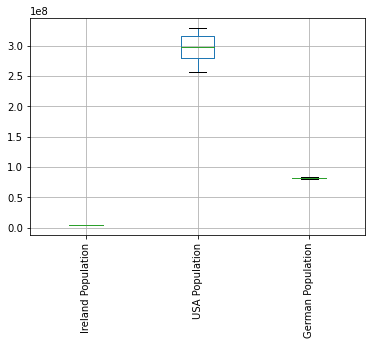

In [47]:
allPopulationData.boxplot(rot=90);

In [48]:
fig = px.line(allPopulationData[['Ireland Population', 'USA Population', 'German Population']].pct_change().cumsum(),
             labels={'value': 'Percentage Population Growth',
                    'Date':'Date'})
fig.update_layout(title_text='Population Percentage Growth Ireland, Germany & USA', 
                  title_x=0.5, legend_title='Population')
fig.show()

## Production Per Capita

In [49]:
bovineMeat = allData.copy()
bovineMeat.drop(bovineMeat.tail(len(allData) - len(irelandPop)).index, inplace=True)

bovineMeatData = pd.DataFrame()
bovineMeatData['Ireland Per Capita Bovine Meat Production'] = bovineMeat['Ireland Bovine Meat'].values / irelandPop['Ireland Population'].values * 1000000
bovineMeatData['USA Per Capita Bovine Meat Production'] = bovineMeat['USA Bovine Meat'].values / usaPop['USA Population'].values * 1000000
bovineMeatData['Germany Per Capita Bovine Meat Production'] = bovineMeat['Germany Bovine Meat'].values / germanyPop['German Population'].values * 1000000

In [50]:
fig = px.line(bovineMeatData.pct_change().cumsum(),
             labels={'value': 'Percentage Cattle Slaughter Growth',
                    'Date':'Date'})
fig.update_layout(title_text='Bovine Meat Percentage Growth Per Capita in Ireland, Germany & USA', 
                  title_x=0.5, legend_title='Per Capita Production')
fig.show()

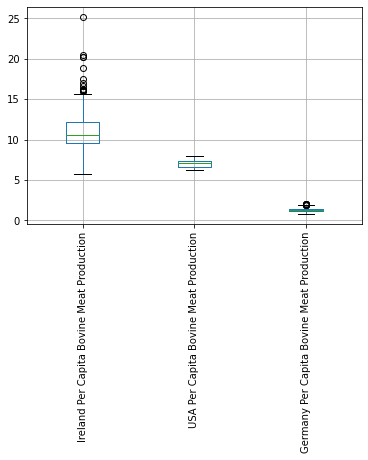

In [51]:
bovineMeatData.boxplot(rot=90);

## Trade

In [52]:
allTrade = pd.concat([irelandTrade, germanyTrade, usaTrade], axis=1)
allTrade

Element     Export Quantity  Import Quantity  Ireland Surplus  \
Year                                                            
1992-01-01            71485             6630            64855   
1992-02-01            72090             6511            65579   
1992-03-01            72695             6393            66302   
1992-04-01            73300             6274            67026   
1992-05-01            73905             6156            67750   
...                     ...              ...              ...   
2019-09-01            35891             6804            29087   
2019-10-01            35511             6884            28627   
2019-11-01            35130             6963            28167   
2019-12-01            34750             7043            27707   
2020-01-01            34370             7123            27247   

Element     Germany Surplus  USA Surplus  
Year                                      
1992-01-01           359471        18592  
1992-02-01           351320        15481  
1992-03-01           343170        12370  
1992-04-01           335019         9259  
1992-05-01           326869         6148  
...                     ...          ...  
2019-09-01            15933         1815  
2019-10-01            15174          233  
2019-11-01            14414        -1348  
2019-12-01            13655        -2930  
2020-01-01            12896        -4511  

[337 rows x 5 columns]

In [53]:
fig = px.line(allTrade,
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})

fig.show()

In [54]:
fig = px.line(allTrade.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})

fig.show()

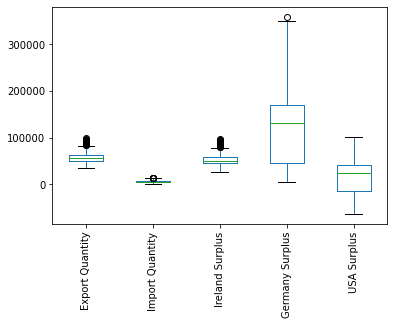

In [55]:
allTrade.plot(kind='box', rot=90);

## Land Productivity Per Meat Annual Data

In [56]:
beefProduction = pd.concat([irelandLand, germanyLand, usaLand], axis=1)

fig = px.line(beefProduction.pct_change().cumsum())

fig.show()

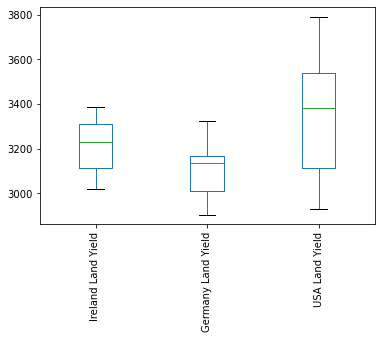

In [57]:
beefProduction.plot(kind='box', rot=90);

## For Machine Learning Model

### Ireland

In [58]:
irelandAllData = pd.concat([irelandGDP, irelandLand, irelandPop, 
                            irelandTrade, prices, irelandData], axis=1).dropna()
irelandAllData

Ireland GDP  Ireland GDP Per Capita  Ireland Land Yield  \
1992-01-01  76486482000                   11728                3309   
1992-02-01  76658105500                   11801                3308   
1992-03-01  76829729000                   11874                3308   
1992-04-01  77001352500                   11947                3308   
1992-05-01  77172976000                   12020                3307   
...                 ...                     ...                 ...   
2019-09-01 347254666667                   73943                3359   
2019-10-01 348888500000                   74155                3361   
2019-11-01 350522333333                   74366                3363   
2019-12-01 352156166667                   74577                3364   
2020-01-01 353790000000                   74788                3366   

            Ireland Population  Export Quantity  Import Quantity  \
1992-01-01             3558430            71485             6630   
1992-02-01             3559916            72090             6511   
1992-03-01             3561402            72695             6393   
1992-04-01             3562888            73300             6274   
1992-05-01             3564374            73905             6156   
...                        ...              ...              ...   
2019-09-01             4974596            35891             6804   
2019-10-01             4979628            35511             6884   
2019-11-01             4984660            35130             6963   
2019-12-01             4989692            34750             7043   
2020-01-01             4994724            34370             7123   

            Ireland Surplus  Price  Ireland Bovine Meat  
1992-01-01            64855    252                   35  
1992-02-01            65579    247                   32  
1992-03-01            66302    242                   47  
1992-04-01            67026    237                   40  
1992-05-01            67750    238                   34  
...                     ...    ...                  ...  
2019-09-01            29087    504                   33  
2019-10-01            28627    530                   62  
2019-11-01            28167    503                   60  
2019-12-01            27707    476                   48  
2020-01-01            27247    450                   56  

[337 rows x 9 columns]

In [59]:
irelandAllData.describe()

Ireland GDP  Ireland GDP Per Capita  Ireland Land Yield  \
count          337                     337                 337   
mean  183252997914                   37539                3215   
std    71261498532                   16454                 112   
min    76486482000                   11728                3018   
25%   130485000000                   24713                3112   
50%   187426333333                   37709                3230   
75%   202103000000                   43652                3309   
max   353790000000                   74788                3388   

       Ireland Population  Export Quantity  Import Quantity  Ireland Surplus  \
count                 337              337              337              337   
mean              4230366            58341             6074            52268   
std                464416            11742             2677            12831   
min               3558430            34370               97            27247   
25%               3754786            50600             4485            44733   
50%               4273591            56909             6093            50424   
75%               4623816            63288             7778            58111   
max               4994724            98538            13568            96894   

       Price  Ireland Bovine Meat  
count    337                  337  
mean     294                   46  
std      102                    9  
min      166                   21  
25%      202                   41  
50%      260                   46  
75%      400                   52  
max      564                   90

In [60]:
#ProfileReport(irelandAllData)

### Germany

In [61]:
germanyAllData = pd.concat([germanyGDP, germanyLand, germanyPop, 
                            germanyTrade, prices, germanData], axis=1).dropna()
germanyAllData

Germany GDP  Germany GDP Per Capita  Germany Land Yield  \
1992-01-01 2261460000000                   21111                2905   
1992-02-01 2259619166667                   21150                2909   
1992-03-01 2257778333333                   21188                2912   
1992-04-01 2255937500000                   21227                2916   
1992-05-01 2254096666667                   21265                2919   
...                  ...                     ...                 ...   
2019-09-01 3146116666667                   40930                3301   
2019-10-01 3133760000000                   40821                3307   
2019-11-01 3121403333333                   40712                3313   
2019-12-01 3109046666667                   40603                3319   
2020-01-01 3096690000000                   40495                3325   

            German Population  Germany Surplus  Price  Germany Bovine Meat  
1992-01-01           80624598           359471    252                  159  
1992-02-01           80668912           351320    247                  140  
1992-03-01           80713226           343170    242                  165  
1992-04-01           80757539           335019    237                  156  
1992-05-01           80801853           326869    238                  145  
...                       ...              ...    ...                  ...  
2019-09-01           83191337            15933    504                   93  
2019-10-01           83203634            15174    530                  103  
2019-11-01           83215931            14414    503                  111  
2019-12-01           83228228            13655    476                   89  
2020-01-01           83240525            12896    450                  100  

[337 rows x 7 columns]

In [62]:
germanyAllData.describe()

Germany GDP  Germany GDP Per Capita  Germany Land Yield  \
count           337                     337                 337   
mean  2714755771513                   30110                3097   
std    291356466367                    6046                 101   
min   2239370000000                   21111                2905   
25%   2483280000000                   25085                3012   
50%   2691383333333                   28953                3135   
75%   2917240000000                   34861                3166   
max   3244970000000                   41801                3325   

       German Population  Germany Surplus  Price  Germany Bovine Meat  
count                337              337    337                  337  
mean            81940129           122119    294                  106  
std               723564            73854    102                   18  
min             80274983             5268    166                   60  
25%             81526606            46622    202                   93  
50%             82075465           131788    260                  103  
75%             82453927           169629    400                  116  
max             83240525           359471    564                  165

In [63]:
#ProfileReport(germanyAllData)

### USA

In [64]:
usaAllData = pd.concat([usaGDP, usaLand, usaPop, 
                            usaTrade, prices, usaData], axis=1).dropna()
usaAllData

USA GDP  USA GDP Per Capita  USA Land Yield  USA Population  \
1992-01-01 10139200000000               25419            3014       256514000   
1992-02-01 10162450000000               25500            3014       256797750   
1992-03-01 10185700000000               25580            3014       257081500   
1992-04-01 10208950000000               25661            3014       257365250   
1992-05-01 10232200000000               25742            3014       257649000   
...                   ...                 ...             ...             ...   
2019-09-01 19521166666667               63898            3671       329099400   
2019-10-01 19464500000000               63725            3679       329195580   
2019-11-01 19407833333333               63552            3687       329291761   
2019-12-01 19351166666667               63379            3696       329387942   
2020-01-01 19294500000000               63207            3704       329484123   

            USA Surplus  Price  USA Bovine Meat  
1992-01-01        18592    252             2030  
1992-02-01        15481    247             2048  
1992-03-01        12370    242             2044  
1992-04-01         9259    237             2046  
1992-05-01         6148    238             2059  
...                 ...    ...              ...  
2019-09-01         1815    504             2083  
2019-10-01          233    530             2094  
2019-11-01        -1348    503             2121  
2019-12-01        -2930    476             2112  
2020-01-01        -4511    450             2108  

[337 rows x 7 columns]

In [65]:
usaAllData.describe()

USA GDP  USA GDP Per Capita  USA Land Yield  USA Population  \
count            337                 337             337             337   
mean  15289187685460               44425            3352       296997587   
std    2784128131669               11526             245        21612764   
min   10139200000000               25419            2929       256514000   
25%   13193600000000               34514            3112       279040000   
50%   15946616666667               46299            3383       298379912   
75%   17258200000000               53107            3539       316059947   
max   19974500000000               65280            3791       329484123   

       USA Surplus  Price  USA Bovine Meat  
count          337    337              337  
mean         14705    294             2083  
std          36285    102               61  
min         -64484    166             1967  
25%         -14452    202             2044  
50%          25189    260             2070  
75%          41028    400             2112  
max         102163    564             2275

In [66]:
#ProfileReport(usaAllData)

# Statistics

https://www.statology.org/python-guides/


In [67]:
import matplotlib.pyplot as plt
import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

#Homogeinity of variance: Levene's test
from scipy.stats import levene

## QQ Plots

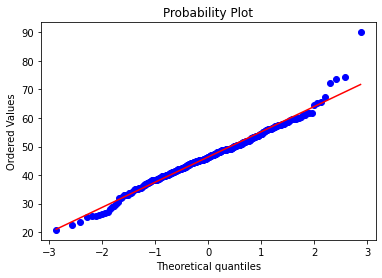

<Figure size 432x288 with 0 Axes>

In [68]:
#Normality plot. Our variable is "charges"
stats.probplot(irelandAllData['Ireland Bovine Meat'], plot=plt)
plt.figure();

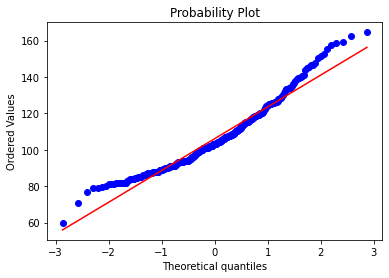

<Figure size 432x288 with 0 Axes>

In [69]:
#Normality plot. Our variable is "charges"
stats.probplot(germanyAllData['Germany Bovine Meat'], plot=plt)
plt.figure();

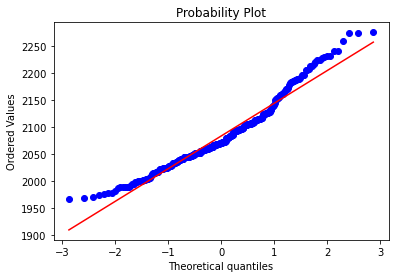

<Figure size 432x288 with 0 Axes>

In [70]:
#Normality plot. Our variable is "charges"
stats.probplot(usaAllData['USA Bovine Meat'], plot=plt)
plt.figure();

## Shapiro Wilk Test

In [71]:
#Shapiro wilk test
stats.shapiro(irelandAllData['Ireland Bovine Meat'])

ShapiroResult(statistic=0.980545699596405, pvalue=0.00015911944501567632)

In [72]:
# Normal Distribution Test
stat, p = stats.normaltest(irelandAllData['Ireland Bovine Meat'])
print('stat=%.3f, p=%3f\n' % (stat,p))

stat=21.897, p=0.000018



In [73]:
result = stats.anderson(irelandAllData['Ireland Bovine Meat'])
print('stat=%.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
    if result.statistic < crit_val:
        print('Proboably Guassian : {} critical value at {} level of signficance'.format(crit_val,sig_lev))
    else:
        print('Proboably not Guassian : {} critical value at {} level of signficance'.format(crit_val,sig_lev))

stat=0.912
Proboably not Guassian : 0.569 critical value at 15.0 level of signficance
Proboably not Guassian : 0.648 critical value at 10.0 level of signficance
Proboably not Guassian : 0.778 critical value at 5.0 level of signficance
Proboably not Guassian : 0.907 critical value at 2.5 level of signficance
Proboably Guassian : 1.079 critical value at 1.0 level of signficance


In [74]:
# Chi-Square Normaility Test
statistic, pvalue = stats.chisquare(irelandAllData['Ireland Bovine Meat'])
print('statistic=%.3f, p=%.3f\n' % (statistic, pvalue))

statistic=571.314, p=0.000



In [75]:
#Shapiro wilk test
stats.shapiro(germanyAllData['Germany Bovine Meat'])

ShapiroResult(statistic=0.9548953771591187, pvalue=1.1692160128973228e-08)

In [76]:
# Normal Distribution Test
stat, p = stats.normaltest(germanyAllData['Germany Bovine Meat'])
print('stat=%.3f, p=%3f\n' % (stat,p))

stat=33.696, p=0.000000



In [77]:
result = stats.anderson(germanyAllData['Germany Bovine Meat'])
print('stat=%.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
    if result.statistic < crit_val:
        print('Proboably Guassian : {} critical value at {} level of signficance'.format(crit_val,sig_lev))
    else:
        print('Proboably not Guassian : {} critical value at {} level of signficance'.format(crit_val,sig_lev))

stat=4.153
Proboably not Guassian : 0.569 critical value at 15.0 level of signficance
Proboably not Guassian : 0.648 critical value at 10.0 level of signficance
Proboably not Guassian : 0.778 critical value at 5.0 level of signficance
Proboably not Guassian : 0.907 critical value at 2.5 level of signficance
Proboably not Guassian : 1.079 critical value at 1.0 level of signficance


In [78]:
# Chi-Square Normaility Test
statistic, pvalue = stats.chisquare(germanyAllData['Germany Bovine Meat'])
print('statistic=%.3f, p=%.3f\n' % (statistic, pvalue))

statistic=1001.031, p=0.000



In [79]:
#Shapiro wilk test
stats.shapiro(usaAllData['USA Bovine Meat'])

ShapiroResult(statistic=0.9577063322067261, pvalue=2.770600460166861e-08)

In [80]:
# Normal Distribution Test
stat, p = stats.normaltest(usaAllData['USA Bovine Meat'])
print('stat=%.3f, p=%3f\n' % (stat,p))

stat=29.666, p=0.000000



In [81]:
result = stats.anderson(usaAllData['USA Bovine Meat'])
print('stat=%.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
    if result.statistic < crit_val:
        print('Proboably Guassian : {} critical value at {} level of signficance'.format(crit_val,sig_lev))
    else:
        print('Proboably not Guassian : {} critical value at {} level of signficance'.format(crit_val,sig_lev))

stat=4.217
Proboably not Guassian : 0.569 critical value at 15.0 level of signficance
Proboably not Guassian : 0.648 critical value at 10.0 level of signficance
Proboably not Guassian : 0.778 critical value at 5.0 level of signficance
Proboably not Guassian : 0.907 critical value at 2.5 level of signficance
Proboably not Guassian : 1.079 critical value at 1.0 level of signficance


In [82]:
# Chi-Square Normaility Test
statistic, pvalue = stats.chisquare(usaAllData['USA Bovine Meat'])
print('statistic=%.3f, p=%.3f\n' % (statistic, pvalue))

statistic=609.334, p=0.000



In [83]:
levene(irelandAllData['Ireland Bovine Meat'],
       germanyAllData['Germany Bovine Meat'],
       usaAllData['USA Bovine Meat'], 
       center = 'mean')

LeveneResult(statistic=302.22289896043605, pvalue=1.4845857018439324e-103)

In [84]:
#perform one-way ANOVA
stats.f_oneway(irelandAllData['Ireland Bovine Meat'],
       germanyAllData['Germany Bovine Meat'],
       usaAllData['USA Bovine Meat'])

F_onewayResult(statistic=325503.5807404495, pvalue=0.0)

In [85]:
#perform Mann-Kendall Trend Test
import pymannkendall as mk

mk.original_test(irelandAllData['Ireland Bovine Meat'])

Mann_Kendall_Test(trend='increasing', h=True, p=1.6705501758584873e-05, z=4.304908168911338, Tau=0.15716405256464602, s=8898.0, var_s=4271293.333333333, slope=0.02166666666666656, intercept=42.65000000000002)

In [86]:
mk.original_test(germanyAllData['Germany Bovine Meat'])

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-13.826207982864648, Tau=-0.5047159813480289, s=-28575.0, var_s=4271062.333333333, slope=-0.12112033138666302, intercept=123.34821567295938)

In [87]:
mk.original_test(usaAllData['USA Bovine Meat'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.015737816134482, Tau=0.3290765861240639, s=18631.0, var_s=4269953.666666667, slope=0.2738663876004681, intercept=2024.1327774356887)

## Mann-Whitney U test

In [88]:
#perform the Mann-Whitney U test
stats.mannwhitneyu(irelandAllData['Ireland Bovine Meat'], 
                   germanyAllData['Germany Bovine Meat'], 
                   alternative='two-sided')

MannwhitneyuResult(statistic=77.5, pvalue=1.7569631292776826e-111)

In [89]:
#perform the Mann-Whitney U test
stats.mannwhitneyu(irelandAllData['Ireland Bovine Meat'], 
                   usaAllData['USA Bovine Meat'], 
                   alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=8.753468717400352e-112)

In [90]:
#perform the Mann-Whitney U test
stats.mannwhitneyu(germanyAllData['Germany Bovine Meat'], 
                   usaAllData['USA Bovine Meat'], 
                   alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=8.740854439028161e-112)

## Regions Two Way Anova

In [91]:
cols = ['GDP', 'GDPPerCapita', 'LandYield', 'Population', 'Surplus', 'Price', 'BovineMeat']
region1 = irelandAllData.drop(columns=['Export Quantity', 'Import Quantity'])
region1.columns = cols
region1['Region'] = 'Ireland'
region1

region2 = germanyAllData.copy()
region2.columns = cols
region2['Region'] = 'Germany'

region3 = usaAllData.copy()
region3.columns = cols
region3['Region'] = 'USA'

regions = pd.concat([region1, region2, region3], axis=0)
regions.reset_index(inplace=True, drop=True)
regions

GDP  GDPPerCapita  LandYield  Population  Surplus  Price  \
0       76486482000         11728       3309     3558430    64855    252   
1       76658105500         11801       3308     3559916    65579    247   
2       76829729000         11874       3308     3561402    66302    242   
3       77001352500         11947       3308     3562888    67026    237   
4       77172976000         12020       3307     3564374    67750    238   
...             ...           ...        ...         ...      ...    ...   
1006 19521166666667         63898       3671   329099400     1815    504   
1007 19464500000000         63725       3679   329195580      233    530   
1008 19407833333333         63552       3687   329291761    -1348    503   
1009 19351166666667         63379       3696   329387942    -2930    476   
1010 19294500000000         63207       3704   329484123    -4511    450   

      BovineMeat   Region  
0             35  Ireland  
1             32  Ireland  
2             47  Ireland  
3             40  Ireland  
4             34  Ireland  
...          ...      ...  
1006        2083      USA  
1007        2094      USA  
1008        2121      USA  
1009        2112      USA  
1010        2108      USA  

[1011 rows x 8 columns]

In [92]:
#ONE-WAY ANOVA
model = ols('BovineMeat~Region', data = regions).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

           df    sum_sq   mean_sq      F  PR(>F)
Region      2 905481488 452740744 325504       0
Residual 1008   1402020      1391    NaN     NaN


In [93]:
#ANOVA TWO WAYS
model2 = ols('BovineMeat~Region+LandYield', data = regions).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

            df    sum_sq   mean_sq      F  PR(>F)
Region       2 905481488 452740744 369498       0
LandYield    1    168158    168158    137       0
Residual  1007   1233863      1225    NaN     NaN


In [94]:
#ANOVA TWO WAYS
model2 = ols('BovineMeat~Region+Surplus', data = regions).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

           df    sum_sq   mean_sq      F  PR(>F)
Region      2 905481488 452740744 346198       0
Surplus     1     85116     85116     65       0
Residual 1007   1316904      1308    NaN     NaN


# Data PreProcessing

In [95]:
target = irelandAllData['Ireland Bovine Meat']
irelandAllData.drop(columns=['Ireland Bovine Meat'], inplace=True)
irelandAllData['Ireland Bovine Meat'] = target

In [96]:
irelandAllData

Ireland GDP  Ireland GDP Per Capita  Ireland Land Yield  \
1992-01-01  76486482000                   11728                3309   
1992-02-01  76658105500                   11801                3308   
1992-03-01  76829729000                   11874                3308   
1992-04-01  77001352500                   11947                3308   
1992-05-01  77172976000                   12020                3307   
...                 ...                     ...                 ...   
2019-09-01 347254666667                   73943                3359   
2019-10-01 348888500000                   74155                3361   
2019-11-01 350522333333                   74366                3363   
2019-12-01 352156166667                   74577                3364   
2020-01-01 353790000000                   74788                3366   

            Ireland Population  Export Quantity  Import Quantity  \
1992-01-01             3558430            71485             6630   
1992-02-01             3559916            72090             6511   
1992-03-01             3561402            72695             6393   
1992-04-01             3562888            73300             6274   
1992-05-01             3564374            73905             6156   
...                        ...              ...              ...   
2019-09-01             4974596            35891             6804   
2019-10-01             4979628            35511             6884   
2019-11-01             4984660            35130             6963   
2019-12-01             4989692            34750             7043   
2020-01-01             4994724            34370             7123   

            Ireland Surplus  Price  Ireland Bovine Meat  
1992-01-01            64855    252                   35  
1992-02-01            65579    247                   32  
1992-03-01            66302    242                   47  
1992-04-01            67026    237                   40  
1992-05-01            67750    238                   34  
...                     ...    ...                  ...  
2019-09-01            29087    504                   33  
2019-10-01            28627    530                   62  
2019-11-01            28167    503                   60  
2019-12-01            27707    476                   48  
2020-01-01            27247    450                   56  

[337 rows x 9 columns]

In [97]:
irelandAllData.insert(loc=7, column='MovingAverage', 
                      value=irelandAllData['Ireland Bovine Meat'].rolling(12).mean())

In [98]:
irelandAllData.fillna(method='bfill', inplace=True)

## SARI MAX

In [99]:
# https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
# https://www.statsmodels.org/v0.12.0/examples/index.html

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm
import statsmodels.api as sm

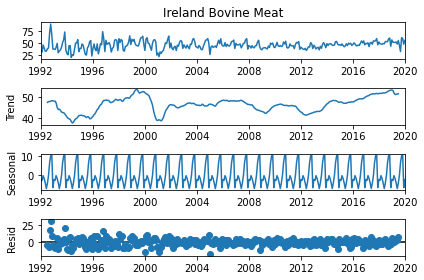

In [100]:
decompose_data = seasonal_decompose(irelandAllData['Ireland Bovine Meat'], model="additive")
decompose_data.plot();

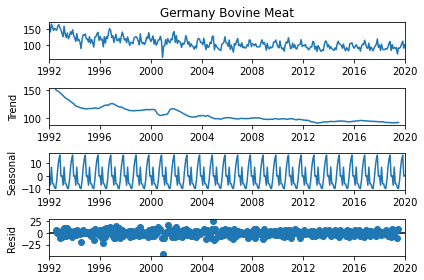

In [101]:
decompose_data = seasonal_decompose(germanyAllData['Germany Bovine Meat'], model="additive")
decompose_data.plot();

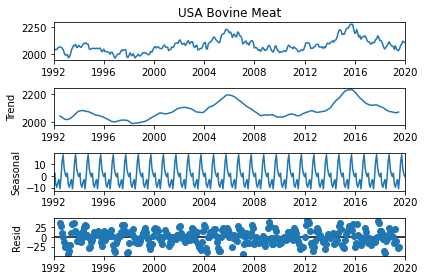

In [102]:
decompose_data = seasonal_decompose(usaAllData['USA Bovine Meat'], model="additive")
decompose_data.plot();

In [103]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(irelandAllData[['Ireland Bovine Meat']], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.2397494171804384
2. P-Value :  0.017796078747002262
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 322
5. Critical Values :
	 1% :  -3.4508226600665037
	 5% :  -2.870558121868621
	 10% :  -2.571574731684734


In [104]:
data = irelandAllData[['Ireland Bovine Meat']]
data

Ireland Bovine Meat
1992-01-01                   35
1992-02-01                   32
1992-03-01                   47
1992-04-01                   40
1992-05-01                   34
...                         ...
2019-09-01                   33
2019-10-01                   62
2019-11-01                   60
2019-12-01                   48
2020-01-01                   56

[337 rows x 1 columns]

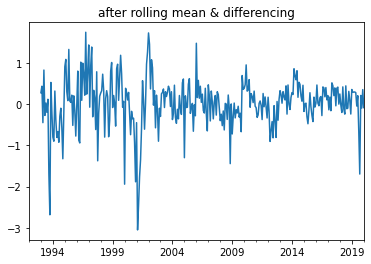

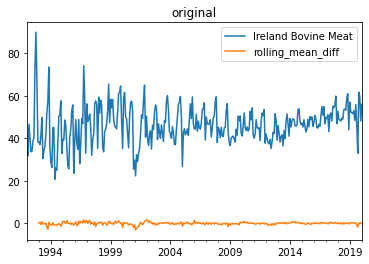

In [105]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [106]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.7508920426068615
2. P-Value :  6.745540284934927e-05
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 311
5. Critical Values :
	 1% :  -3.451552879535732
	 5% :  -2.8708786756338407
	 10% :  -2.571745666091128


In [107]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['Ireland Bovine Meat'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

                                SARIMAX Results                                
Dep. Variable:     Ireland Bovine Meat   No. Observations:                  337
Model:                SARIMAX(1, 1, 1)   Log Likelihood               -1169.110
Date:                 Wed, 11 May 2022   AIC                           2346.219
Time:                         16:05:59   BIC                           2361.488
Sample:                     01-01-1992   HQIC                          2352.306
                          - 01-01-2020                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0089      0.006      1.384      0.166      -0.004       0.021
ar.L1          0.4582      0.036     12.804      0.000       0.388       0.528
ma.L1         -0.9997      0.355     -2.814 

In [108]:
model=sm.tsa.arima.ARIMA(data['Ireland Bovine Meat'],order=(1,1,1))
history=model.fit()

In [109]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Ireland Bovine Meat   No. Observations:                  337
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -1170.422
Date:                 Wed, 11 May 2022   AIC                           2346.845
Time:                         16:05:59   BIC                           2358.296
Sample:                     01-01-1992   HQIC                          2351.409
                          - 01-01-2020                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4528      0.035     12.762      0.000       0.383       0.522
ma.L1         -0.9812      0.015    -65.908      0.000      -1.010      -0.952
sigma2        61.6794      3.323     18.564      0.000      55.167      68.191
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                80.61
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['Ireland Bovine Meat'],order=(1,1,1))
res = mod.fit()
print(res.summary())

                                SARIMAX Results                                
Dep. Variable:     Ireland Bovine Meat   No. Observations:                  337
Model:                SARIMAX(1, 1, 1)   Log Likelihood               -1170.422
Date:                 Wed, 11 May 2022   AIC                           2346.845
Time:                         16:05:59   BIC                           2358.296
Sample:                     01-01-1992   HQIC                          2351.409
                          - 01-01-2020                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4528      0.035     12.762      0.000       0.383       0.522
ma.L1         -0.9812      0.015    -65.908      0.000      -1.010      -0.952
sigma2        61.6794      3.323     18.564 

In [111]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [112]:
# Dynamic predictions
predict_dy = res.get_prediction(dynamic='1992-01-01')
predict_dy_ci = predict_dy.conf_int()

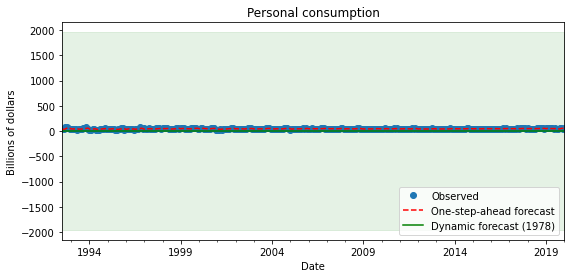

In [113]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
data.loc['1992-07-01':, 'Ireland Bovine Meat'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1992-07-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1992-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['1992-07-01':].plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1992-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

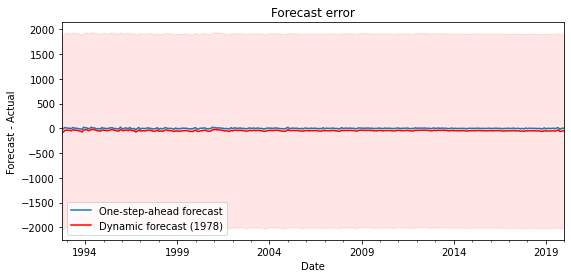

In [114]:
# Prediction error
endog = data.loc['1992-01-01':, 'Ireland Bovine Meat']
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.loc['1992-10-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['1992-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1992-10-01':]
ci.iloc[:,1] -= endog.loc['1992-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['1992-10-01':].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1992-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1992-10-01':]
ci.iloc[:,1] -= endog.loc['1992-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

# Machine Learning Models

In [115]:
from xgboost import XGBRegressor
#from sklearn.model_selection import RepeatedKFold, cross_val_score
#from sklearn.metrics import r2_score

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [117]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        # iterate over all but the final step
        # fit and transform the data
        X_transformed = estimator.fit_transform(X_transformed, y)
    # fit the last step
    self.steps[-1][1].fit(X_transformed, y)
    return self

def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        # iterate over all but the final step
        # transform the data
        X_transformed = step[1].transform(X_transformed)
    # fit the last step
    return self.steps[-1][1].predict(X_transformed)

In [118]:
irelandAllData.insert(loc=0, column='Month', value=irelandAllData.index.month)
irelandAllData.Month = irelandAllData.astype(str)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(irelandAllData.iloc[:, :-1], 
                                irelandAllData.iloc[:, -1], 
                                test_size = 0.50, shuffle=False)

In [193]:
X_train.drop(X_train.tail(1).index, inplace=True)
X_test.drop(X_test.tail(1).index, inplace=True)

y_train = y_train.iloc[1:]
y_test = y_test.iloc[1:]

In [120]:
#irelandAllData.iloc[237:,-1].mean()

In [121]:
#irelandAllData['Ireland Bovine Meat'].plot()

In [141]:
# https://lifewithdata.com/2022/03/09/onehotencoder-how-to-do-one-hot-encoding-in-sklearn/
# get the categorical and numeric column names
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

In [142]:
# pipeline for numerical columns
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'))

# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False))

# combine both the pipelines
full_pipe = ColumnTransformer([
    ('cat', cat_pipe, cat_cols)])

## Ridge

In [194]:
pipe = make_pipeline(full_pipe, StandardScaler(), Ridge())

paramGrid = {'ridge__normalize': [True, False],
            'ridge__alpha' : [10.0, 1.0, 0.1, 0.001, 0.0001]}

grid = GridSearchCV(pipe, paramGrid, cv=5)

grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

R2 Train Score 0.5080720716010696 
R2 Test Score -0.3004150485656176 


In [210]:
pipe = make_pipeline(full_pipe, StandardScaler(), Lasso())

paramGrid = {'lasso__normalize': [True, False],
            'lasso__alpha' : [10.0, 1.0, 0.1, 0.001, 0.0001]}

grid = GridSearchCV(pipe, paramGrid, cv=5)

grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

R2 Train Score 0.44794485342567814 
R2 Test Score 0.04460398164896773 


In [209]:
pipe = make_pipeline(full_pipe, StandardScaler(), KMeans(n_clusters=4),
                     StandardScaler(), Lasso())

paramGrid = {'lasso__normalize': [True, False],
            'lasso__alpha' : [10.0, 1.0, 0.1, 0.001, 0.0001]}

grid = GridSearchCV(pipe, paramGrid, cv=5)

grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

R2 Train Score 0.11418345930230489 
R2 Test Score -0.25131197513198944 


In [196]:
from sklearn.cluster import KMeans

pipe = make_pipeline(full_pipe, StandardScaler(), 
                     KMeans(n_clusters=5), StandardScaler(), Lasso())

paramGrid = {'lasso__normalize': [True, False],
            'lasso__alpha' : [10.0, 1.0, 0.1, 0.001, 0.0001]}

grid = GridSearchCV(pipe, paramGrid, cv=5)

grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

R2 Train Score 0.19104969577625464 
R2 Test Score -0.37458652483139976 


from sklearn.linear_model import BayesianRidge

pipe = make_pipeline(full_pipe, StandardScaler(), BayesianRidge())

paramGrid = {'bayesianridge__normalize': [True, False],
            'bayesianrudge__n_iter' : [300, 500, 1000]}

grid = GridSearchCV(pipe, paramGrid, cv=5)

grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

## PolyNomial Features Ridge

In [197]:
pipe = make_pipeline(full_pipe, StandardScaler(), PolynomialFeatures(), Ridge())

paramGrid = {'polynomialfeatures__degree': [1, 2, 3],
'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = RandomizedSearchCV(pipe, paramGrid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)) )

R2 Train Score 0.44745566191923414 
R2 Test Score 0.10819918234891246 


## Random Forest

In [198]:
pipe = make_pipeline(full_pipe, StandardScaler(),
                     RandomForestRegressor())

paramGrid = {'randomforestregressor__n_estimators': [100, 200, 300, 500],
            'randomforestregressor__max_depth': [10, 50, 70, 100],
            'randomforestregressor__bootstrap': [True, False]}

grid = GridSearchCV(pipe, paramGrid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)) )

R2 Train Score 0.511495659929881 
R2 Test Score -0.48703827144602707 


## XGBoost

In [199]:
# https://xgboost.readthedocs.io/en/stable/python/examples/sklearn_parallel.html#sphx-glr-python-examples-sklearn-parallel-py
pipe = make_pipeline(full_pipe, MinMaxScaler(), 
                     XGBRegressor())

paramGrid = {'xgbregressor__max_depth': [2, 4, 6],
            'xgbregressor__n_estimators': [50, 100, 200, 400, 500, 1000],
            'xgbregressor__gamma': [0.01, 0.1, 1.0],
            'xgbregressor__learning_rate': [0.001, 0.01, 0.1]}

grid = GridSearchCV(pipe, paramGrid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

R2 Train Score 0.48823562822273736 
R2 Test Score -0.1550288615603277 


## KNeighbors Regressor

In [207]:
from sklearn.neighbors import KNeighborsRegressor

pipe = make_pipeline(full_pipe,  
                     StandardScaler(), KNeighborsRegressor())

paramGrid = {'kneighborsregressor__n_neighbors': [2, 3, 4, 5, 6, 7, 10, 15, 20, 30,100],
            'kneighborsregressor__p': [1, 2]}

grid = GridSearchCV(pipe, paramGrid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

R2 Train Score 0.4980084951274949 
R2 Test Score -0.8189947029124909 


## Cat Boost Regressor

In [201]:
#https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
from catboost import CatBoostRegressor, Pool

pipe = make_pipeline(full_pipe, StandardScaler(), CatBoostRegressor())

paramGrid = {'catboostregressor__depth': [4, 6, 10, 15, 20],
             'catboostregressor__iterations': [30, 50, 100],
            'catboostregressor__learning_rate': [0.001, 0.03,0.01, 0.1, 1]}

grid = RandomizedSearchCV(pipe, paramGrid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

#print("Best estimator:\n{}".format(grid.best_estimator_))

print('R2 Train Score {} '.format(grid.score(X_train, y_train)))
print('R2 Test Score {} '.format(grid.score(X_test, y_test)))

0:	learn: 10.7374099	total: 410us	remaining: 40.7ms
1:	learn: 10.4285464	total: 868us	remaining: 42.5ms
2:	learn: 10.1101364	total: 1.2ms	remaining: 38.7ms
3:	learn: 9.8497453	total: 1.54ms	remaining: 37.1ms
4:	learn: 9.5743997	total: 1.89ms	remaining: 36ms
5:	learn: 9.4336625	total: 2.31ms	remaining: 36.1ms
6:	learn: 9.2877048	total: 2.68ms	remaining: 35.6ms
7:	learn: 9.1299704	total: 2.96ms	remaining: 34ms
8:	learn: 8.9472816	total: 3.33ms	remaining: 33.6ms
9:	learn: 8.9005537	total: 3.55ms	remaining: 32ms
10:	learn: 8.8558897	total: 3.87ms	remaining: 31.3ms
11:	learn: 8.7472629	total: 4.17ms	remaining: 30.6ms
12:	learn: 8.6489773	total: 4.54ms	remaining: 30.4ms
13:	learn: 8.5228405	total: 4.93ms	remaining: 30.3ms
14:	learn: 8.4286730	total: 5.33ms	remaining: 30.2ms
15:	learn: 8.3987693	total: 5.75ms	remaining: 30.2ms
16:	learn: 8.3747197	total: 6.04ms	remaining: 29.5ms
17:	learn: 8.3250701	total: 6.42ms	remaining: 29.2ms
18:	learn: 8.2707577	total: 6.81ms	remaining: 29ms
19:	learn: 

In [132]:
paramGrid = {'depth': [4, 6, 10],
            'learning_rate': [0.03, 0.1, 1]}

model = CatBoostRegressor()
randomized_search_result = model.randomized_search(paramGrid,
                                                   X=X_train,
                                                   y=y_train,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 45.9175389	test: 45.3950111	best: 45.3950111 (0)	total: 4.36ms	remaining: 4.35s
1:	learn: 44.6887675	test: 44.1768394	best: 44.1768394 (1)	total: 5.21ms	remaining: 2.6s
2:	learn: 43.5328420	test: 43.0044710	best: 43.0044710 (2)	total: 5.83ms	remaining: 1.94s
3:	learn: 42.4172525	test: 41.8740048	best: 41.8740048 (3)	total: 6.47ms	remaining: 1.61s
4:	learn: 41.3784059	test: 40.8469410	best: 40.8469410 (4)	total: 7.04ms	remaining: 1.4s
5:	learn: 40.3312710	test: 39.8106781	best: 39.8106781 (5)	total: 7.53ms	remaining: 1.25s
6:	learn: 39.3398172	test: 38.8558631	best: 38.8558631 (6)	total: 8.18ms	remaining: 1.16s
7:	learn: 38.3485349	test: 37.9089668	best: 37.9089668 (7)	total: 9.13ms	remaining: 1.13s
8:	learn: 37.4062099	test: 36.9959315	best: 36.9959315 (8)	total: 9.85ms	remaining: 1.08s
9:	learn: 36.4552075	test: 36.0377273	best: 36.0377273 (9)	total: 10.5ms	remaining: 1.04s
10:	learn: 35.5537275	test: 35.1429055	best: 35.1429055 (10)	total: 11.6ms	remaining: 1.04s
11:	learn:

91:	learn: 9.0455650	test: 9.8502367	best: 9.8502367 (91)	total: 63.9ms	remaining: 630ms
92:	learn: 8.9767469	test: 9.7772846	best: 9.7772846 (92)	total: 64.9ms	remaining: 633ms
93:	learn: 8.9007081	test: 9.7167058	best: 9.7167058 (93)	total: 65.7ms	remaining: 634ms
94:	learn: 8.8559500	test: 9.6789912	best: 9.6789912 (94)	total: 66.5ms	remaining: 634ms
95:	learn: 8.7923267	test: 9.6147258	best: 9.6147258 (95)	total: 67.5ms	remaining: 635ms
96:	learn: 8.6989404	test: 9.5032927	best: 9.5032927 (96)	total: 68.6ms	remaining: 639ms
97:	learn: 8.6280259	test: 9.4410551	best: 9.4410551 (97)	total: 69.2ms	remaining: 637ms
98:	learn: 8.5363725	test: 9.3438831	best: 9.3438831 (98)	total: 69.7ms	remaining: 635ms
99:	learn: 8.4800068	test: 9.2898790	best: 9.2898790 (99)	total: 70.1ms	remaining: 631ms
100:	learn: 8.4146210	test: 9.2607975	best: 9.2607975 (100)	total: 70.6ms	remaining: 628ms
101:	learn: 8.3604445	test: 9.2180888	best: 9.2180888 (101)	total: 71.1ms	remaining: 626ms
102:	learn: 8.307

217:	learn: 5.1748645	test: 6.5330619	best: 6.5323949 (216)	total: 160ms	remaining: 574ms
218:	learn: 5.1697075	test: 6.5337230	best: 6.5323949 (216)	total: 161ms	remaining: 573ms
219:	learn: 5.1648114	test: 6.5304691	best: 6.5304691 (219)	total: 162ms	remaining: 573ms
220:	learn: 5.1568253	test: 6.5344072	best: 6.5304691 (219)	total: 163ms	remaining: 575ms
221:	learn: 5.1331833	test: 6.5198951	best: 6.5198951 (221)	total: 164ms	remaining: 575ms
222:	learn: 5.1223753	test: 6.5193477	best: 6.5193477 (222)	total: 165ms	remaining: 574ms
223:	learn: 5.1130933	test: 6.5138940	best: 6.5138940 (223)	total: 166ms	remaining: 574ms
224:	learn: 5.1048931	test: 6.5124086	best: 6.5124086 (224)	total: 166ms	remaining: 573ms
225:	learn: 5.0924453	test: 6.4963599	best: 6.4963599 (225)	total: 167ms	remaining: 572ms
226:	learn: 5.0813968	test: 6.4934589	best: 6.4934589 (226)	total: 167ms	remaining: 570ms
227:	learn: 5.0779498	test: 6.4954174	best: 6.4934589 (226)	total: 168ms	remaining: 569ms
228:	learn

436:	learn: 3.6203343	test: 5.9455048	best: 5.9406124 (435)	total: 327ms	remaining: 422ms
437:	learn: 3.6168871	test: 5.9396598	best: 5.9396598 (437)	total: 328ms	remaining: 421ms
438:	learn: 3.6105211	test: 5.9361601	best: 5.9361601 (438)	total: 329ms	remaining: 421ms
439:	learn: 3.6037270	test: 5.9397430	best: 5.9361601 (438)	total: 330ms	remaining: 420ms
440:	learn: 3.5937441	test: 5.9358407	best: 5.9358407 (440)	total: 330ms	remaining: 419ms
441:	learn: 3.5861469	test: 5.9315542	best: 5.9315542 (441)	total: 331ms	remaining: 418ms
442:	learn: 3.5850005	test: 5.9314296	best: 5.9314296 (442)	total: 332ms	remaining: 417ms
443:	learn: 3.5790544	test: 5.9315817	best: 5.9314296 (442)	total: 332ms	remaining: 416ms
444:	learn: 3.5777533	test: 5.9314618	best: 5.9314296 (442)	total: 333ms	remaining: 415ms
445:	learn: 3.5740402	test: 5.9258371	best: 5.9258371 (445)	total: 333ms	remaining: 414ms
446:	learn: 3.5657303	test: 5.9218887	best: 5.9218887 (446)	total: 333ms	remaining: 412ms
447:	learn

674:	learn: 2.6693917	test: 6.0698247	best: 5.9218887 (446)	total: 494ms	remaining: 238ms
675:	learn: 2.6664367	test: 6.0671256	best: 5.9218887 (446)	total: 495ms	remaining: 237ms
676:	learn: 2.6651961	test: 6.0668636	best: 5.9218887 (446)	total: 496ms	remaining: 236ms
677:	learn: 2.6631755	test: 6.0664315	best: 5.9218887 (446)	total: 496ms	remaining: 236ms
678:	learn: 2.6582140	test: 6.0662111	best: 5.9218887 (446)	total: 497ms	remaining: 235ms
679:	learn: 2.6555609	test: 6.0676686	best: 5.9218887 (446)	total: 498ms	remaining: 234ms
680:	learn: 2.6506094	test: 6.0666519	best: 5.9218887 (446)	total: 498ms	remaining: 233ms
681:	learn: 2.6492015	test: 6.0662301	best: 5.9218887 (446)	total: 499ms	remaining: 233ms
682:	learn: 2.6450788	test: 6.0655403	best: 5.9218887 (446)	total: 500ms	remaining: 232ms
683:	learn: 2.6381055	test: 6.0663956	best: 5.9218887 (446)	total: 500ms	remaining: 231ms
684:	learn: 2.6362813	test: 6.0654982	best: 5.9218887 (446)	total: 501ms	remaining: 230ms
685:	learn

785:	learn: 2.3144443	test: 6.0843642	best: 5.9218887 (446)	total: 564ms	remaining: 154ms
786:	learn: 2.3136347	test: 6.0841550	best: 5.9218887 (446)	total: 565ms	remaining: 153ms
787:	learn: 2.3100343	test: 6.0845872	best: 5.9218887 (446)	total: 565ms	remaining: 152ms
788:	learn: 2.3061460	test: 6.0890925	best: 5.9218887 (446)	total: 566ms	remaining: 151ms
789:	learn: 2.3054010	test: 6.0891738	best: 5.9218887 (446)	total: 567ms	remaining: 151ms
790:	learn: 2.3016163	test: 6.0962283	best: 5.9218887 (446)	total: 567ms	remaining: 150ms
791:	learn: 2.2988655	test: 6.0982183	best: 5.9218887 (446)	total: 568ms	remaining: 149ms
792:	learn: 2.2936897	test: 6.0968500	best: 5.9218887 (446)	total: 568ms	remaining: 148ms
793:	learn: 2.2917910	test: 6.0972050	best: 5.9218887 (446)	total: 569ms	remaining: 148ms
794:	learn: 2.2883671	test: 6.0976818	best: 5.9218887 (446)	total: 570ms	remaining: 147ms
795:	learn: 2.2876228	test: 6.0982514	best: 5.9218887 (446)	total: 570ms	remaining: 146ms
796:	learn

936:	learn: 1.9465926	test: 6.1484504	best: 5.9218887 (446)	total: 660ms	remaining: 44.4ms
937:	learn: 1.9462076	test: 6.1485642	best: 5.9218887 (446)	total: 661ms	remaining: 43.7ms
938:	learn: 1.9440148	test: 6.1506748	best: 5.9218887 (446)	total: 661ms	remaining: 43ms
939:	learn: 1.9423196	test: 6.1505698	best: 5.9218887 (446)	total: 662ms	remaining: 42.3ms
940:	learn: 1.9403449	test: 6.1507896	best: 5.9218887 (446)	total: 663ms	remaining: 41.5ms
941:	learn: 1.9379246	test: 6.1523432	best: 5.9218887 (446)	total: 663ms	remaining: 40.8ms
942:	learn: 1.9341998	test: 6.1510528	best: 5.9218887 (446)	total: 664ms	remaining: 40.1ms
943:	learn: 1.9338398	test: 6.1513221	best: 5.9218887 (446)	total: 664ms	remaining: 39.4ms
944:	learn: 1.9333130	test: 6.1518281	best: 5.9218887 (446)	total: 666ms	remaining: 38.7ms
945:	learn: 1.9313731	test: 6.1519053	best: 5.9218887 (446)	total: 666ms	remaining: 38ms
946:	learn: 1.9302538	test: 6.1520481	best: 5.9218887 (446)	total: 667ms	remaining: 37.3ms
947

173:	learn: 2.9060454	test: 6.3118095	best: 6.2181134 (149)	total: 119ms	remaining: 565ms
174:	learn: 2.9025972	test: 6.3111448	best: 6.2181134 (149)	total: 120ms	remaining: 564ms
175:	learn: 2.8871880	test: 6.3144057	best: 6.2181134 (149)	total: 120ms	remaining: 564ms
176:	learn: 2.8776966	test: 6.3110869	best: 6.2181134 (149)	total: 121ms	remaining: 563ms
177:	learn: 2.8618756	test: 6.3180868	best: 6.2181134 (149)	total: 122ms	remaining: 563ms
178:	learn: 2.8577312	test: 6.3181909	best: 6.2181134 (149)	total: 123ms	remaining: 562ms
179:	learn: 2.8462607	test: 6.3067424	best: 6.2181134 (149)	total: 123ms	remaining: 562ms
180:	learn: 2.8426113	test: 6.3035183	best: 6.2181134 (149)	total: 124ms	remaining: 561ms
181:	learn: 2.8310203	test: 6.3004509	best: 6.2181134 (149)	total: 125ms	remaining: 560ms
182:	learn: 2.8246247	test: 6.3038749	best: 6.2181134 (149)	total: 125ms	remaining: 559ms
183:	learn: 2.8062889	test: 6.3017399	best: 6.2181134 (149)	total: 126ms	remaining: 557ms
184:	learn

277:	learn: 1.8969192	test: 6.3784552	best: 6.2181134 (149)	total: 188ms	remaining: 489ms
278:	learn: 1.8893712	test: 6.3816128	best: 6.2181134 (149)	total: 189ms	remaining: 488ms
279:	learn: 1.8866230	test: 6.3810263	best: 6.2181134 (149)	total: 189ms	remaining: 487ms
280:	learn: 1.8803940	test: 6.3848205	best: 6.2181134 (149)	total: 190ms	remaining: 486ms
281:	learn: 1.8714191	test: 6.3893130	best: 6.2181134 (149)	total: 191ms	remaining: 485ms
282:	learn: 1.8648354	test: 6.3958334	best: 6.2181134 (149)	total: 191ms	remaining: 484ms
283:	learn: 1.8544863	test: 6.4010207	best: 6.2181134 (149)	total: 192ms	remaining: 483ms
284:	learn: 1.8470010	test: 6.4032111	best: 6.2181134 (149)	total: 192ms	remaining: 483ms
285:	learn: 1.8456021	test: 6.4032131	best: 6.2181134 (149)	total: 193ms	remaining: 482ms
286:	learn: 1.8432044	test: 6.4039264	best: 6.2181134 (149)	total: 194ms	remaining: 481ms
287:	learn: 1.8411593	test: 6.4034046	best: 6.2181134 (149)	total: 195ms	remaining: 481ms
288:	learn

425:	learn: 1.2527129	test: 6.4007141	best: 6.2181134 (149)	total: 286ms	remaining: 385ms
426:	learn: 1.2509938	test: 6.4027516	best: 6.2181134 (149)	total: 286ms	remaining: 384ms
427:	learn: 1.2481048	test: 6.4024583	best: 6.2181134 (149)	total: 287ms	remaining: 384ms
428:	learn: 1.2455242	test: 6.4048026	best: 6.2181134 (149)	total: 288ms	remaining: 383ms
429:	learn: 1.2411850	test: 6.4074481	best: 6.2181134 (149)	total: 289ms	remaining: 383ms
430:	learn: 1.2395414	test: 6.4094738	best: 6.2181134 (149)	total: 289ms	remaining: 382ms
431:	learn: 1.2379486	test: 6.4102270	best: 6.2181134 (149)	total: 290ms	remaining: 381ms
432:	learn: 1.2358658	test: 6.4133478	best: 6.2181134 (149)	total: 291ms	remaining: 380ms
433:	learn: 1.2331318	test: 6.4140821	best: 6.2181134 (149)	total: 291ms	remaining: 380ms
434:	learn: 1.2304338	test: 6.4143993	best: 6.2181134 (149)	total: 292ms	remaining: 380ms
435:	learn: 1.2279807	test: 6.4135921	best: 6.2181134 (149)	total: 293ms	remaining: 379ms
436:	learn

526:	learn: 0.9838780	test: 6.4365412	best: 6.2181134 (149)	total: 355ms	remaining: 319ms
527:	learn: 0.9828555	test: 6.4364201	best: 6.2181134 (149)	total: 356ms	remaining: 318ms
528:	learn: 0.9819073	test: 6.4364214	best: 6.2181134 (149)	total: 357ms	remaining: 318ms
529:	learn: 0.9807184	test: 6.4380177	best: 6.2181134 (149)	total: 357ms	remaining: 317ms
530:	learn: 0.9799969	test: 6.4384088	best: 6.2181134 (149)	total: 358ms	remaining: 316ms
531:	learn: 0.9768794	test: 6.4426404	best: 6.2181134 (149)	total: 359ms	remaining: 316ms
532:	learn: 0.9738246	test: 6.4453338	best: 6.2181134 (149)	total: 360ms	remaining: 315ms
533:	learn: 0.9701136	test: 6.4469349	best: 6.2181134 (149)	total: 360ms	remaining: 314ms
534:	learn: 0.9672370	test: 6.4476794	best: 6.2181134 (149)	total: 361ms	remaining: 313ms
535:	learn: 0.9666534	test: 6.4478964	best: 6.2181134 (149)	total: 361ms	remaining: 313ms
536:	learn: 0.9650968	test: 6.4461787	best: 6.2181134 (149)	total: 362ms	remaining: 312ms
537:	learn

663:	learn: 0.7264134	test: 6.5376682	best: 6.2181134 (149)	total: 453ms	remaining: 229ms
664:	learn: 0.7238247	test: 6.5359251	best: 6.2181134 (149)	total: 453ms	remaining: 228ms
665:	learn: 0.7210141	test: 6.5368153	best: 6.2181134 (149)	total: 454ms	remaining: 228ms
666:	learn: 0.7182158	test: 6.5398845	best: 6.2181134 (149)	total: 455ms	remaining: 227ms
667:	learn: 0.7158156	test: 6.5340901	best: 6.2181134 (149)	total: 455ms	remaining: 226ms
668:	learn: 0.7144047	test: 6.5323171	best: 6.2181134 (149)	total: 456ms	remaining: 225ms
669:	learn: 0.7123517	test: 6.5327530	best: 6.2181134 (149)	total: 456ms	remaining: 225ms
670:	learn: 0.7092078	test: 6.5324577	best: 6.2181134 (149)	total: 457ms	remaining: 224ms
671:	learn: 0.7083021	test: 6.5322033	best: 6.2181134 (149)	total: 457ms	remaining: 223ms
672:	learn: 0.7066305	test: 6.5318241	best: 6.2181134 (149)	total: 458ms	remaining: 222ms
673:	learn: 0.7058646	test: 6.5327520	best: 6.2181134 (149)	total: 458ms	remaining: 222ms
674:	learn

768:	learn: 0.5603991	test: 6.5567257	best: 6.2181134 (149)	total: 522ms	remaining: 157ms
769:	learn: 0.5601611	test: 6.5567240	best: 6.2181134 (149)	total: 523ms	remaining: 156ms
770:	learn: 0.5597384	test: 6.5568175	best: 6.2181134 (149)	total: 524ms	remaining: 156ms
771:	learn: 0.5587568	test: 6.5563592	best: 6.2181134 (149)	total: 524ms	remaining: 155ms
772:	learn: 0.5560448	test: 6.5565385	best: 6.2181134 (149)	total: 525ms	remaining: 154ms
773:	learn: 0.5556540	test: 6.5566697	best: 6.2181134 (149)	total: 526ms	remaining: 154ms
774:	learn: 0.5551191	test: 6.5575424	best: 6.2181134 (149)	total: 527ms	remaining: 153ms
775:	learn: 0.5530911	test: 6.5577846	best: 6.2181134 (149)	total: 528ms	remaining: 152ms
776:	learn: 0.5510615	test: 6.5581199	best: 6.2181134 (149)	total: 528ms	remaining: 152ms
777:	learn: 0.5502166	test: 6.5596039	best: 6.2181134 (149)	total: 528ms	remaining: 151ms
778:	learn: 0.5493967	test: 6.5605777	best: 6.2181134 (149)	total: 529ms	remaining: 150ms
779:	learn

909:	learn: 0.4081137	test: 6.5841429	best: 6.2181134 (149)	total: 618ms	remaining: 61.1ms
910:	learn: 0.4071849	test: 6.5838460	best: 6.2181134 (149)	total: 619ms	remaining: 60.5ms
911:	learn: 0.4065475	test: 6.5833014	best: 6.2181134 (149)	total: 620ms	remaining: 59.9ms
912:	learn: 0.4063787	test: 6.5830903	best: 6.2181134 (149)	total: 621ms	remaining: 59.2ms
913:	learn: 0.4058888	test: 6.5823280	best: 6.2181134 (149)	total: 622ms	remaining: 58.5ms
914:	learn: 0.4054725	test: 6.5825900	best: 6.2181134 (149)	total: 623ms	remaining: 57.8ms
915:	learn: 0.4045235	test: 6.5827236	best: 6.2181134 (149)	total: 623ms	remaining: 57.2ms
916:	learn: 0.4038577	test: 6.5825737	best: 6.2181134 (149)	total: 624ms	remaining: 56.5ms
917:	learn: 0.4032954	test: 6.5824806	best: 6.2181134 (149)	total: 625ms	remaining: 55.8ms
918:	learn: 0.4022471	test: 6.5809503	best: 6.2181134 (149)	total: 626ms	remaining: 55.1ms
919:	learn: 0.4017433	test: 6.5809618	best: 6.2181134 (149)	total: 626ms	remaining: 54.5ms

4:	learn: 6.9001963	test: 8.5197298	best: 8.5197298 (4)	total: 4.04ms	remaining: 804ms
5:	learn: 6.5409273	test: 8.1717754	best: 8.1717754 (5)	total: 4.69ms	remaining: 777ms
6:	learn: 6.1429953	test: 8.2321114	best: 8.1717754 (5)	total: 5.45ms	remaining: 773ms
7:	learn: 5.4831972	test: 8.1554060	best: 8.1554060 (7)	total: 6.21ms	remaining: 771ms
8:	learn: 5.2060472	test: 7.8118669	best: 7.8118669 (8)	total: 6.86ms	remaining: 756ms
9:	learn: 4.9280115	test: 7.7156810	best: 7.7156810 (9)	total: 7.65ms	remaining: 758ms
10:	learn: 4.7842839	test: 7.8354676	best: 7.7156810 (9)	total: 8.27ms	remaining: 743ms
11:	learn: 4.5923204	test: 7.7890732	best: 7.7156810 (9)	total: 8.87ms	remaining: 730ms
12:	learn: 4.2367679	test: 7.7945029	best: 7.7156810 (9)	total: 9.58ms	remaining: 728ms
13:	learn: 4.1541056	test: 7.7746070	best: 7.7156810 (9)	total: 10.2ms	remaining: 720ms
14:	learn: 3.8051393	test: 7.9075267	best: 7.7156810 (9)	total: 10.8ms	remaining: 707ms
15:	learn: 3.6649658	test: 8.0037745	b

152:	learn: 0.0963568	test: 9.4899706	best: 7.7156810 (9)	total: 100ms	remaining: 555ms
153:	learn: 0.0941541	test: 9.4881990	best: 7.7156810 (9)	total: 101ms	remaining: 554ms
154:	learn: 0.0919534	test: 9.4852032	best: 7.7156810 (9)	total: 102ms	remaining: 557ms
155:	learn: 0.0892925	test: 9.4852165	best: 7.7156810 (9)	total: 103ms	remaining: 556ms
156:	learn: 0.0856239	test: 9.4835652	best: 7.7156810 (9)	total: 104ms	remaining: 557ms
157:	learn: 0.0843669	test: 9.4833109	best: 7.7156810 (9)	total: 104ms	remaining: 556ms
158:	learn: 0.0830270	test: 9.4822331	best: 7.7156810 (9)	total: 105ms	remaining: 556ms
159:	learn: 0.0807304	test: 9.4824313	best: 7.7156810 (9)	total: 106ms	remaining: 555ms
160:	learn: 0.0793930	test: 9.4838988	best: 7.7156810 (9)	total: 106ms	remaining: 554ms
161:	learn: 0.0784635	test: 9.4848111	best: 7.7156810 (9)	total: 107ms	remaining: 553ms
162:	learn: 0.0777193	test: 9.4846601	best: 7.7156810 (9)	total: 107ms	remaining: 551ms
163:	learn: 0.0773497	test: 9.48

386:	learn: 0.0006026	test: 9.4854047	best: 7.7156810 (9)	total: 267ms	remaining: 423ms
387:	learn: 0.0005824	test: 9.4854147	best: 7.7156810 (9)	total: 268ms	remaining: 422ms
388:	learn: 0.0005727	test: 9.4854156	best: 7.7156810 (9)	total: 269ms	remaining: 422ms
389:	learn: 0.0005672	test: 9.4854113	best: 7.7156810 (9)	total: 269ms	remaining: 421ms
390:	learn: 0.0005507	test: 9.4854201	best: 7.7156810 (9)	total: 270ms	remaining: 421ms
391:	learn: 0.0005382	test: 9.4854188	best: 7.7156810 (9)	total: 271ms	remaining: 420ms
392:	learn: 0.0005268	test: 9.4853999	best: 7.7156810 (9)	total: 271ms	remaining: 419ms
393:	learn: 0.0005226	test: 9.4853992	best: 7.7156810 (9)	total: 272ms	remaining: 419ms
394:	learn: 0.0005177	test: 9.4854126	best: 7.7156810 (9)	total: 273ms	remaining: 418ms
395:	learn: 0.0005007	test: 9.4854130	best: 7.7156810 (9)	total: 273ms	remaining: 417ms
396:	learn: 0.0004763	test: 9.4854054	best: 7.7156810 (9)	total: 274ms	remaining: 416ms
397:	learn: 0.0004626	test: 9.48

613:	learn: 0.0000057	test: 9.4854631	best: 7.7156810 (9)	total: 435ms	remaining: 273ms
614:	learn: 0.0000057	test: 9.4854632	best: 7.7156810 (9)	total: 436ms	remaining: 273ms
615:	learn: 0.0000056	test: 9.4854633	best: 7.7156810 (9)	total: 436ms	remaining: 272ms
616:	learn: 0.0000055	test: 9.4854634	best: 7.7156810 (9)	total: 437ms	remaining: 271ms
617:	learn: 0.0000055	test: 9.4854634	best: 7.7156810 (9)	total: 438ms	remaining: 271ms
618:	learn: 0.0000054	test: 9.4854633	best: 7.7156810 (9)	total: 439ms	remaining: 270ms
619:	learn: 0.0000053	test: 9.4854634	best: 7.7156810 (9)	total: 440ms	remaining: 269ms
620:	learn: 0.0000051	test: 9.4854632	best: 7.7156810 (9)	total: 440ms	remaining: 269ms
621:	learn: 0.0000051	test: 9.4854633	best: 7.7156810 (9)	total: 441ms	remaining: 268ms
622:	learn: 0.0000050	test: 9.4854634	best: 7.7156810 (9)	total: 441ms	remaining: 267ms
623:	learn: 0.0000048	test: 9.4854635	best: 7.7156810 (9)	total: 442ms	remaining: 266ms
624:	learn: 0.0000048	test: 9.48

712:	learn: 0.0000008	test: 9.4854640	best: 7.7156810 (9)	total: 504ms	remaining: 203ms
713:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 505ms	remaining: 202ms
714:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 506ms	remaining: 202ms
715:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 506ms	remaining: 201ms
716:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 507ms	remaining: 200ms
717:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 508ms	remaining: 199ms
718:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 508ms	remaining: 199ms
719:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 509ms	remaining: 198ms
720:	learn: 0.0000007	test: 9.4854640	best: 7.7156810 (9)	total: 509ms	remaining: 197ms
721:	learn: 0.0000006	test: 9.4854640	best: 7.7156810 (9)	total: 510ms	remaining: 196ms
722:	learn: 0.0000006	test: 9.4854640	best: 7.7156810 (9)	total: 510ms	remaining: 196ms
723:	learn: 0.0000006	test: 9.48

859:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 599ms	remaining: 97.5ms
860:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 600ms	remaining: 96.8ms
861:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 600ms	remaining: 96.1ms
862:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 601ms	remaining: 95.4ms
863:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 602ms	remaining: 94.7ms
864:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 602ms	remaining: 94ms
865:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 603ms	remaining: 93.3ms
866:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 604ms	remaining: 92.6ms
867:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 604ms	remaining: 91.9ms
868:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 605ms	remaining: 91.2ms
869:	learn: 0.0000000	test: 9.4854641	best: 7.7156810 (9)	total: 606ms	remaining: 90.5ms
870:	learn: 0.0000000	t

35:	learn: 20.9628765	test: 21.3607857	best: 21.3607857 (35)	total: 63.3ms	remaining: 1.7s
36:	learn: 20.5563440	test: 20.9554754	best: 20.9554754 (36)	total: 64.6ms	remaining: 1.68s
37:	learn: 20.1634786	test: 20.5977696	best: 20.5977696 (37)	total: 66.5ms	remaining: 1.68s
38:	learn: 19.7930217	test: 20.2595650	best: 20.2595650 (38)	total: 68ms	remaining: 1.68s
39:	learn: 19.3799065	test: 19.8741205	best: 19.8741205 (39)	total: 69.1ms	remaining: 1.66s
40:	learn: 19.0030010	test: 19.5105502	best: 19.5105502 (40)	total: 70.2ms	remaining: 1.64s
41:	learn: 18.6461412	test: 19.2062726	best: 19.2062726 (41)	total: 71.2ms	remaining: 1.62s
42:	learn: 18.3043571	test: 18.8553028	best: 18.8553028 (42)	total: 72.4ms	remaining: 1.61s
43:	learn: 17.9516858	test: 18.5483391	best: 18.5483391 (43)	total: 73.3ms	remaining: 1.59s
44:	learn: 17.6307680	test: 18.2416313	best: 18.2416313 (44)	total: 74.1ms	remaining: 1.57s
45:	learn: 17.2917439	test: 17.9221222	best: 17.9221222 (45)	total: 75ms	remaining:

186:	learn: 4.9446744	test: 7.1861621	best: 7.1861621 (186)	total: 236ms	remaining: 1.03s
187:	learn: 4.9232871	test: 7.1737898	best: 7.1737898 (187)	total: 237ms	remaining: 1.02s
188:	learn: 4.8957645	test: 7.1509385	best: 7.1509385 (188)	total: 238ms	remaining: 1.02s
189:	learn: 4.8771991	test: 7.1530934	best: 7.1509385 (188)	total: 239ms	remaining: 1.02s
190:	learn: 4.8501034	test: 7.1358820	best: 7.1358820 (190)	total: 241ms	remaining: 1.02s
191:	learn: 4.8299361	test: 7.1180110	best: 7.1180110 (191)	total: 242ms	remaining: 1.02s
192:	learn: 4.8011904	test: 7.0983094	best: 7.0983094 (192)	total: 243ms	remaining: 1.02s
193:	learn: 4.7855934	test: 7.0876421	best: 7.0876421 (193)	total: 245ms	remaining: 1.02s
194:	learn: 4.7665577	test: 7.0756943	best: 7.0756943 (194)	total: 246ms	remaining: 1.01s
195:	learn: 4.7407349	test: 7.0545388	best: 7.0545388 (195)	total: 247ms	remaining: 1.01s
196:	learn: 4.7218773	test: 7.0471670	best: 7.0471670 (196)	total: 248ms	remaining: 1.01s
197:	learn

337:	learn: 3.1915000	test: 6.4551521	best: 6.4551521 (337)	total: 409ms	remaining: 801ms
338:	learn: 3.1872230	test: 6.4591163	best: 6.4551521 (337)	total: 410ms	remaining: 800ms
339:	learn: 3.1751199	test: 6.4599676	best: 6.4551521 (337)	total: 411ms	remaining: 798ms
340:	learn: 3.1621100	test: 6.4565130	best: 6.4551521 (337)	total: 412ms	remaining: 797ms
341:	learn: 3.1588314	test: 6.4564776	best: 6.4551521 (337)	total: 413ms	remaining: 795ms
342:	learn: 3.1555338	test: 6.4567365	best: 6.4551521 (337)	total: 414ms	remaining: 794ms
343:	learn: 3.1518109	test: 6.4591170	best: 6.4551521 (337)	total: 416ms	remaining: 792ms
344:	learn: 3.1486533	test: 6.4591122	best: 6.4551521 (337)	total: 416ms	remaining: 791ms
345:	learn: 3.1378747	test: 6.4606339	best: 6.4551521 (337)	total: 417ms	remaining: 789ms
346:	learn: 3.1347850	test: 6.4590341	best: 6.4551521 (337)	total: 419ms	remaining: 788ms
347:	learn: 3.1257710	test: 6.4642978	best: 6.4551521 (337)	total: 420ms	remaining: 788ms
348:	learn

482:	learn: 2.4063187	test: 6.4028587	best: 6.3901845 (435)	total: 582ms	remaining: 622ms
483:	learn: 2.4014235	test: 6.4022843	best: 6.3901845 (435)	total: 583ms	remaining: 621ms
484:	learn: 2.3981937	test: 6.4026019	best: 6.3901845 (435)	total: 584ms	remaining: 620ms
485:	learn: 2.3920844	test: 6.4002835	best: 6.3901845 (435)	total: 586ms	remaining: 620ms
486:	learn: 2.3891780	test: 6.4009528	best: 6.3901845 (435)	total: 588ms	remaining: 619ms
487:	learn: 2.3829439	test: 6.3955047	best: 6.3901845 (435)	total: 589ms	remaining: 618ms
488:	learn: 2.3811657	test: 6.3958407	best: 6.3901845 (435)	total: 590ms	remaining: 616ms
489:	learn: 2.3791747	test: 6.3951884	best: 6.3901845 (435)	total: 591ms	remaining: 615ms
490:	learn: 2.3711075	test: 6.3961421	best: 6.3901845 (435)	total: 592ms	remaining: 613ms
491:	learn: 2.3635807	test: 6.3997552	best: 6.3901845 (435)	total: 593ms	remaining: 612ms
492:	learn: 2.3606892	test: 6.4028519	best: 6.3901845 (435)	total: 594ms	remaining: 611ms
493:	learn

635:	learn: 1.8486428	test: 6.4058081	best: 6.3711446 (579)	total: 755ms	remaining: 432ms
636:	learn: 1.8469757	test: 6.4054283	best: 6.3711446 (579)	total: 756ms	remaining: 431ms
637:	learn: 1.8453754	test: 6.4051277	best: 6.3711446 (579)	total: 757ms	remaining: 430ms
638:	learn: 1.8416874	test: 6.4053039	best: 6.3711446 (579)	total: 758ms	remaining: 428ms
639:	learn: 1.8373425	test: 6.4065712	best: 6.3711446 (579)	total: 760ms	remaining: 427ms
640:	learn: 1.8361437	test: 6.4063032	best: 6.3711446 (579)	total: 761ms	remaining: 426ms
641:	learn: 1.8338264	test: 6.4065482	best: 6.3711446 (579)	total: 762ms	remaining: 425ms
642:	learn: 1.8298159	test: 6.4055824	best: 6.3711446 (579)	total: 763ms	remaining: 424ms
643:	learn: 1.8287158	test: 6.4047449	best: 6.3711446 (579)	total: 764ms	remaining: 422ms
644:	learn: 1.8257576	test: 6.4022896	best: 6.3711446 (579)	total: 765ms	remaining: 421ms
645:	learn: 1.8233413	test: 6.4012602	best: 6.3711446 (579)	total: 766ms	remaining: 420ms
646:	learn

787:	learn: 1.4547722	test: 6.4879479	best: 6.3711446 (579)	total: 928ms	remaining: 250ms
788:	learn: 1.4526126	test: 6.4887932	best: 6.3711446 (579)	total: 929ms	remaining: 249ms
789:	learn: 1.4519880	test: 6.4893113	best: 6.3711446 (579)	total: 930ms	remaining: 247ms
790:	learn: 1.4480961	test: 6.4889208	best: 6.3711446 (579)	total: 931ms	remaining: 246ms
791:	learn: 1.4450614	test: 6.4897084	best: 6.3711446 (579)	total: 933ms	remaining: 245ms
792:	learn: 1.4424180	test: 6.4902420	best: 6.3711446 (579)	total: 934ms	remaining: 244ms
793:	learn: 1.4418780	test: 6.4902053	best: 6.3711446 (579)	total: 935ms	remaining: 243ms
794:	learn: 1.4389737	test: 6.4915369	best: 6.3711446 (579)	total: 936ms	remaining: 241ms
795:	learn: 1.4359158	test: 6.4914379	best: 6.3711446 (579)	total: 937ms	remaining: 240ms
796:	learn: 1.4351096	test: 6.4927364	best: 6.3711446 (579)	total: 938ms	remaining: 239ms
797:	learn: 1.4324817	test: 6.4915963	best: 6.3711446 (579)	total: 939ms	remaining: 238ms
798:	learn

923:	learn: 1.1889185	test: 6.5260091	best: 6.3711446 (579)	total: 1.1s	remaining: 90.7ms
924:	learn: 1.1863795	test: 6.5257857	best: 6.3711446 (579)	total: 1.1s	remaining: 89.5ms
925:	learn: 1.1856854	test: 6.5264619	best: 6.3711446 (579)	total: 1.1s	remaining: 88.3ms
926:	learn: 1.1850834	test: 6.5266064	best: 6.3711446 (579)	total: 1.1s	remaining: 87.1ms
927:	learn: 1.1838973	test: 6.5282956	best: 6.3711446 (579)	total: 1.11s	remaining: 85.9ms
928:	learn: 1.1828921	test: 6.5283264	best: 6.3711446 (579)	total: 1.11s	remaining: 84.7ms
929:	learn: 1.1821062	test: 6.5285409	best: 6.3711446 (579)	total: 1.11s	remaining: 83.5ms
930:	learn: 1.1798113	test: 6.5279571	best: 6.3711446 (579)	total: 1.11s	remaining: 82.3ms
931:	learn: 1.1780506	test: 6.5291117	best: 6.3711446 (579)	total: 1.11s	remaining: 81.1ms
932:	learn: 1.1770394	test: 6.5297117	best: 6.3711446 (579)	total: 1.11s	remaining: 80ms
933:	learn: 1.1756918	test: 6.5289005	best: 6.3711446 (579)	total: 1.11s	remaining: 78.8ms
934:	

44:	learn: 5.9846111	test: 7.8921288	best: 7.8921288 (44)	total: 70.7ms	remaining: 1.5s
45:	learn: 5.8198005	test: 7.7295492	best: 7.7295492 (45)	total: 72.2ms	remaining: 1.5s
46:	learn: 5.6979892	test: 7.5726313	best: 7.5726313 (46)	total: 73.6ms	remaining: 1.49s
47:	learn: 5.5443872	test: 7.4252025	best: 7.4252025 (47)	total: 75ms	remaining: 1.49s
48:	learn: 5.4194462	test: 7.3073343	best: 7.3073343 (48)	total: 76.2ms	remaining: 1.48s
49:	learn: 5.3184903	test: 7.2500259	best: 7.2500259 (49)	total: 77.2ms	remaining: 1.47s
50:	learn: 5.2217936	test: 7.2149385	best: 7.2149385 (50)	total: 78.1ms	remaining: 1.45s
51:	learn: 5.1769937	test: 7.1987300	best: 7.1987300 (51)	total: 79.2ms	remaining: 1.44s
52:	learn: 5.1132625	test: 7.1732630	best: 7.1732630 (52)	total: 80.2ms	remaining: 1.43s
53:	learn: 5.0528619	test: 7.1340561	best: 7.1340561 (53)	total: 81.3ms	remaining: 1.42s
54:	learn: 4.9671080	test: 7.0560251	best: 7.0560251 (54)	total: 82.4ms	remaining: 1.42s
55:	learn: 4.9120742	test

197:	learn: 1.8199716	test: 6.2601159	best: 6.2043129 (123)	total: 240ms	remaining: 970ms
198:	learn: 1.8169925	test: 6.2587491	best: 6.2043129 (123)	total: 241ms	remaining: 971ms
199:	learn: 1.7987536	test: 6.2598471	best: 6.2043129 (123)	total: 243ms	remaining: 971ms
200:	learn: 1.7855173	test: 6.2625876	best: 6.2043129 (123)	total: 244ms	remaining: 971ms
201:	learn: 1.7734084	test: 6.2683201	best: 6.2043129 (123)	total: 245ms	remaining: 970ms
202:	learn: 1.7596451	test: 6.2666093	best: 6.2043129 (123)	total: 247ms	remaining: 968ms
203:	learn: 1.7454857	test: 6.2589776	best: 6.2043129 (123)	total: 248ms	remaining: 966ms
204:	learn: 1.7369530	test: 6.2623534	best: 6.2043129 (123)	total: 249ms	remaining: 966ms
205:	learn: 1.7349012	test: 6.2632299	best: 6.2043129 (123)	total: 250ms	remaining: 964ms
206:	learn: 1.7248267	test: 6.2683347	best: 6.2043129 (123)	total: 251ms	remaining: 963ms
207:	learn: 1.7181473	test: 6.2715448	best: 6.2043129 (123)	total: 253ms	remaining: 964ms
208:	learn

347:	learn: 0.8993816	test: 6.4073087	best: 6.2043129 (123)	total: 411ms	remaining: 770ms
348:	learn: 0.8930878	test: 6.4078017	best: 6.2043129 (123)	total: 412ms	remaining: 769ms
349:	learn: 0.8885259	test: 6.4106186	best: 6.2043129 (123)	total: 414ms	remaining: 769ms
350:	learn: 0.8872685	test: 6.4107510	best: 6.2043129 (123)	total: 415ms	remaining: 768ms
351:	learn: 0.8850709	test: 6.4120952	best: 6.2043129 (123)	total: 416ms	remaining: 767ms
352:	learn: 0.8805026	test: 6.4155652	best: 6.2043129 (123)	total: 417ms	remaining: 765ms
353:	learn: 0.8766287	test: 6.4111831	best: 6.2043129 (123)	total: 419ms	remaining: 764ms
354:	learn: 0.8706645	test: 6.4108253	best: 6.2043129 (123)	total: 420ms	remaining: 763ms
355:	learn: 0.8698038	test: 6.4109414	best: 6.2043129 (123)	total: 421ms	remaining: 762ms
356:	learn: 0.8689759	test: 6.4110713	best: 6.2043129 (123)	total: 422ms	remaining: 761ms
357:	learn: 0.8651022	test: 6.4125730	best: 6.2043129 (123)	total: 424ms	remaining: 760ms
358:	learn

497:	learn: 0.4901390	test: 6.4546787	best: 6.2043129 (123)	total: 585ms	remaining: 590ms
498:	learn: 0.4867035	test: 6.4534270	best: 6.2043129 (123)	total: 586ms	remaining: 588ms
499:	learn: 0.4848214	test: 6.4512496	best: 6.2043129 (123)	total: 587ms	remaining: 587ms
500:	learn: 0.4826003	test: 6.4527843	best: 6.2043129 (123)	total: 588ms	remaining: 586ms
501:	learn: 0.4816100	test: 6.4527180	best: 6.2043129 (123)	total: 589ms	remaining: 584ms
502:	learn: 0.4798538	test: 6.4541486	best: 6.2043129 (123)	total: 590ms	remaining: 583ms
503:	learn: 0.4782061	test: 6.4542702	best: 6.2043129 (123)	total: 591ms	remaining: 582ms
504:	learn: 0.4774055	test: 6.4552480	best: 6.2043129 (123)	total: 592ms	remaining: 580ms
505:	learn: 0.4757020	test: 6.4561299	best: 6.2043129 (123)	total: 593ms	remaining: 579ms
506:	learn: 0.4745598	test: 6.4564701	best: 6.2043129 (123)	total: 595ms	remaining: 578ms
507:	learn: 0.4709721	test: 6.4573219	best: 6.2043129 (123)	total: 596ms	remaining: 577ms
508:	learn

636:	learn: 0.3012422	test: 6.4907435	best: 6.2043129 (123)	total: 758ms	remaining: 432ms
637:	learn: 0.2997824	test: 6.4911748	best: 6.2043129 (123)	total: 759ms	remaining: 431ms
638:	learn: 0.2987030	test: 6.4914693	best: 6.2043129 (123)	total: 760ms	remaining: 430ms
639:	learn: 0.2970399	test: 6.4906948	best: 6.2043129 (123)	total: 761ms	remaining: 428ms
640:	learn: 0.2963196	test: 6.4914762	best: 6.2043129 (123)	total: 762ms	remaining: 427ms
641:	learn: 0.2956899	test: 6.4918497	best: 6.2043129 (123)	total: 764ms	remaining: 426ms
642:	learn: 0.2952393	test: 6.4917749	best: 6.2043129 (123)	total: 765ms	remaining: 425ms
643:	learn: 0.2934227	test: 6.4919863	best: 6.2043129 (123)	total: 767ms	remaining: 424ms
644:	learn: 0.2924837	test: 6.4913076	best: 6.2043129 (123)	total: 769ms	remaining: 423ms
645:	learn: 0.2917295	test: 6.4918980	best: 6.2043129 (123)	total: 771ms	remaining: 422ms
646:	learn: 0.2901767	test: 6.4917102	best: 6.2043129 (123)	total: 772ms	remaining: 421ms
647:	learn

751:	learn: 0.1964280	test: 6.5078929	best: 6.2043129 (123)	total: 932ms	remaining: 307ms
752:	learn: 0.1956264	test: 6.5080519	best: 6.2043129 (123)	total: 933ms	remaining: 306ms
753:	learn: 0.1947524	test: 6.5085894	best: 6.2043129 (123)	total: 935ms	remaining: 305ms
754:	learn: 0.1942138	test: 6.5085670	best: 6.2043129 (123)	total: 936ms	remaining: 304ms
755:	learn: 0.1928511	test: 6.5082270	best: 6.2043129 (123)	total: 937ms	remaining: 302ms
756:	learn: 0.1918497	test: 6.5086167	best: 6.2043129 (123)	total: 938ms	remaining: 301ms
757:	learn: 0.1914591	test: 6.5089002	best: 6.2043129 (123)	total: 939ms	remaining: 300ms
758:	learn: 0.1907746	test: 6.5090422	best: 6.2043129 (123)	total: 940ms	remaining: 298ms
759:	learn: 0.1899181	test: 6.5084435	best: 6.2043129 (123)	total: 941ms	remaining: 297ms
760:	learn: 0.1893346	test: 6.5079837	best: 6.2043129 (123)	total: 942ms	remaining: 296ms
761:	learn: 0.1885006	test: 6.5081400	best: 6.2043129 (123)	total: 943ms	remaining: 294ms
762:	learn

884:	learn: 0.1281275	test: 6.5195464	best: 6.2043129 (123)	total: 1.1s	remaining: 144ms
885:	learn: 0.1275716	test: 6.5195121	best: 6.2043129 (123)	total: 1.1s	remaining: 142ms
886:	learn: 0.1271924	test: 6.5193850	best: 6.2043129 (123)	total: 1.11s	remaining: 141ms
887:	learn: 0.1261925	test: 6.5193858	best: 6.2043129 (123)	total: 1.11s	remaining: 140ms
888:	learn: 0.1258408	test: 6.5193411	best: 6.2043129 (123)	total: 1.11s	remaining: 139ms
889:	learn: 0.1250621	test: 6.5193039	best: 6.2043129 (123)	total: 1.11s	remaining: 137ms
890:	learn: 0.1242570	test: 6.5197765	best: 6.2043129 (123)	total: 1.11s	remaining: 136ms
891:	learn: 0.1241468	test: 6.5196901	best: 6.2043129 (123)	total: 1.11s	remaining: 135ms
892:	learn: 0.1235828	test: 6.5199691	best: 6.2043129 (123)	total: 1.11s	remaining: 133ms
893:	learn: 0.1229780	test: 6.5199521	best: 6.2043129 (123)	total: 1.11s	remaining: 132ms
894:	learn: 0.1227446	test: 6.5200082	best: 6.2043129 (123)	total: 1.11s	remaining: 131ms
895:	learn: 

26:	learn: 1.9287655	test: 8.1817534	best: 7.9066295 (7)	total: 30.4ms	remaining: 1.09s
27:	learn: 1.7188881	test: 8.3172325	best: 7.9066295 (7)	total: 31.5ms	remaining: 1.09s
28:	learn: 1.6824564	test: 8.3193106	best: 7.9066295 (7)	total: 32.9ms	remaining: 1.1s
29:	learn: 1.5968612	test: 8.3308825	best: 7.9066295 (7)	total: 34.2ms	remaining: 1.1s
30:	learn: 1.5378031	test: 8.3102484	best: 7.9066295 (7)	total: 35.5ms	remaining: 1.11s
31:	learn: 1.4430086	test: 8.3384561	best: 7.9066295 (7)	total: 36.7ms	remaining: 1.11s
32:	learn: 1.4209851	test: 8.3454380	best: 7.9066295 (7)	total: 37.9ms	remaining: 1.11s
33:	learn: 1.3093779	test: 8.3695621	best: 7.9066295 (7)	total: 39.2ms	remaining: 1.11s
34:	learn: 1.2748660	test: 8.3593579	best: 7.9066295 (7)	total: 41.1ms	remaining: 1.13s
35:	learn: 1.2204724	test: 8.4361040	best: 7.9066295 (7)	total: 42.4ms	remaining: 1.14s
36:	learn: 1.1641421	test: 8.4907027	best: 7.9066295 (7)	total: 43.5ms	remaining: 1.13s
37:	learn: 1.1173217	test: 8.48708

184:	learn: 0.0027321	test: 8.6409648	best: 7.9066295 (7)	total: 204ms	remaining: 897ms
185:	learn: 0.0026694	test: 8.6409717	best: 7.9066295 (7)	total: 205ms	remaining: 896ms
186:	learn: 0.0025700	test: 8.6410454	best: 7.9066295 (7)	total: 206ms	remaining: 895ms
187:	learn: 0.0024813	test: 8.6410662	best: 7.9066295 (7)	total: 207ms	remaining: 894ms
188:	learn: 0.0024551	test: 8.6410998	best: 7.9066295 (7)	total: 208ms	remaining: 892ms
189:	learn: 0.0024195	test: 8.6411023	best: 7.9066295 (7)	total: 209ms	remaining: 891ms
190:	learn: 0.0022925	test: 8.6411029	best: 7.9066295 (7)	total: 211ms	remaining: 892ms
191:	learn: 0.0022401	test: 8.6411004	best: 7.9066295 (7)	total: 211ms	remaining: 890ms
192:	learn: 0.0021497	test: 8.6410187	best: 7.9066295 (7)	total: 212ms	remaining: 888ms
193:	learn: 0.0021084	test: 8.6410566	best: 7.9066295 (7)	total: 213ms	remaining: 887ms
194:	learn: 0.0019846	test: 8.6410460	best: 7.9066295 (7)	total: 214ms	remaining: 885ms
195:	learn: 0.0019336	test: 8.64

330:	learn: 0.0000151	test: 8.6410723	best: 7.9066295 (7)	total: 377ms	remaining: 762ms
331:	learn: 0.0000143	test: 8.6410720	best: 7.9066295 (7)	total: 378ms	remaining: 760ms
332:	learn: 0.0000139	test: 8.6410720	best: 7.9066295 (7)	total: 379ms	remaining: 759ms
333:	learn: 0.0000135	test: 8.6410720	best: 7.9066295 (7)	total: 381ms	remaining: 759ms
334:	learn: 0.0000131	test: 8.6410721	best: 7.9066295 (7)	total: 382ms	remaining: 758ms
335:	learn: 0.0000129	test: 8.6410723	best: 7.9066295 (7)	total: 383ms	remaining: 757ms
336:	learn: 0.0000128	test: 8.6410724	best: 7.9066295 (7)	total: 384ms	remaining: 756ms
337:	learn: 0.0000125	test: 8.6410721	best: 7.9066295 (7)	total: 385ms	remaining: 754ms
338:	learn: 0.0000122	test: 8.6410720	best: 7.9066295 (7)	total: 386ms	remaining: 753ms
339:	learn: 0.0000119	test: 8.6410719	best: 7.9066295 (7)	total: 387ms	remaining: 752ms
340:	learn: 0.0000116	test: 8.6410720	best: 7.9066295 (7)	total: 388ms	remaining: 751ms
341:	learn: 0.0000112	test: 8.64

479:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 551ms	remaining: 597ms
480:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 553ms	remaining: 596ms
481:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 554ms	remaining: 595ms
482:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 555ms	remaining: 594ms
483:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 556ms	remaining: 592ms
484:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 556ms	remaining: 591ms
485:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 558ms	remaining: 590ms
486:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 559ms	remaining: 589ms
487:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 560ms	remaining: 587ms
488:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 561ms	remaining: 586ms
489:	learn: 0.0000001	test: 8.6410725	best: 7.9066295 (7)	total: 562ms	remaining: 585ms
490:	learn: 0.0000001	test: 8.64

620:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 726ms	remaining: 443ms
621:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 727ms	remaining: 442ms
622:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 728ms	remaining: 441ms
623:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 729ms	remaining: 439ms
624:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 730ms	remaining: 438ms
625:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 731ms	remaining: 437ms
626:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 732ms	remaining: 435ms
627:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 733ms	remaining: 434ms
628:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 734ms	remaining: 433ms
629:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 735ms	remaining: 432ms
630:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 737ms	remaining: 431ms
631:	learn: 0.0000000	test: 8.64

769:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 901ms	remaining: 269ms
770:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 902ms	remaining: 268ms
771:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 903ms	remaining: 267ms
772:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 904ms	remaining: 266ms
773:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 905ms	remaining: 264ms
774:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 907ms	remaining: 263ms
775:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 908ms	remaining: 262ms
776:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 909ms	remaining: 261ms
777:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 911ms	remaining: 260ms
778:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 912ms	remaining: 259ms
779:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 913ms	remaining: 258ms
780:	learn: 0.0000000	test: 8.64

909:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.07s	remaining: 106ms
910:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.08s	remaining: 105ms
911:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.08s	remaining: 104ms
912:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.08s	remaining: 103ms
913:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.08s	remaining: 102ms
914:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.08s	remaining: 101ms
915:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.08s	remaining: 99.4ms
916:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.09s	remaining: 98.3ms
917:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.09s	remaining: 97.1ms
918:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.09s	remaining: 95.9ms
919:	learn: 0.0000000	test: 8.6410725	best: 7.9066295 (7)	total: 1.09s	remaining: 94.7ms
920:	learn: 0.0000000	test:

4:	learn: 42.3362650	test: 42.0336876	best: 42.0336876 (4)	total: 65ms	remaining: 12.9s
5:	learn: 41.4774124	test: 41.2183294	best: 41.2183294 (5)	total: 81.4ms	remaining: 13.5s
6:	learn: 40.7498432	test: 40.5938148	best: 40.5938148 (6)	total: 90.2ms	remaining: 12.8s
7:	learn: 39.8112692	test: 39.6520876	best: 39.6520876 (7)	total: 99.8ms	remaining: 12.4s
8:	learn: 39.1050931	test: 39.0599715	best: 39.0599715 (8)	total: 116ms	remaining: 12.7s
9:	learn: 38.2787743	test: 38.3119588	best: 38.3119588 (9)	total: 132ms	remaining: 13.1s
10:	learn: 37.5965337	test: 37.6772734	best: 37.6772734 (10)	total: 148ms	remaining: 13.3s
11:	learn: 36.6659928	test: 36.7667328	best: 36.7667328 (11)	total: 150ms	remaining: 12.3s
12:	learn: 35.8666407	test: 36.0154302	best: 36.0154302 (12)	total: 154ms	remaining: 11.7s
13:	learn: 35.2234221	test: 35.4577768	best: 35.4577768 (13)	total: 169ms	remaining: 11.9s
14:	learn: 34.4672036	test: 34.7347817	best: 34.7347817 (14)	total: 187ms	remaining: 12.3s
15:	learn

97:	learn: 8.9917884	test: 11.5865159	best: 11.5865159 (97)	total: 1.27s	remaining: 11.7s
98:	learn: 8.8801271	test: 11.5090131	best: 11.5090131 (98)	total: 1.28s	remaining: 11.7s
99:	learn: 8.7778309	test: 11.4278885	best: 11.4278885 (99)	total: 1.3s	remaining: 11.7s
100:	learn: 8.6683036	test: 11.3172633	best: 11.3172633 (100)	total: 1.3s	remaining: 11.6s
101:	learn: 8.5715024	test: 11.2578364	best: 11.2578364 (101)	total: 1.32s	remaining: 11.6s
102:	learn: 8.4717030	test: 11.2110717	best: 11.2110717 (102)	total: 1.34s	remaining: 11.6s
103:	learn: 8.3996320	test: 11.1597238	best: 11.1597238 (103)	total: 1.35s	remaining: 11.6s
104:	learn: 8.2994839	test: 11.0867297	best: 11.0867297 (104)	total: 1.37s	remaining: 11.7s
105:	learn: 8.2227987	test: 11.0204278	best: 11.0204278 (105)	total: 1.38s	remaining: 11.7s
106:	learn: 8.1446315	test: 10.9415418	best: 10.9415418 (106)	total: 1.4s	remaining: 11.7s
107:	learn: 8.0619717	test: 10.8778493	best: 10.8778493 (107)	total: 1.41s	remaining: 11.

188:	learn: 4.2041308	test: 7.6762335	best: 7.6762335 (188)	total: 2.55s	remaining: 11s
189:	learn: 4.1751368	test: 7.6496476	best: 7.6496476 (189)	total: 2.57s	remaining: 11s
190:	learn: 4.1543362	test: 7.6479964	best: 7.6479964 (190)	total: 2.59s	remaining: 11s
191:	learn: 4.1313055	test: 7.6288199	best: 7.6288199 (191)	total: 2.6s	remaining: 11s
192:	learn: 4.1080664	test: 7.6242760	best: 7.6242760 (192)	total: 2.62s	remaining: 10.9s
193:	learn: 4.0791295	test: 7.5992608	best: 7.5992608 (193)	total: 2.63s	remaining: 10.9s
194:	learn: 4.0592312	test: 7.5820762	best: 7.5820762 (194)	total: 2.65s	remaining: 10.9s
195:	learn: 4.0359849	test: 7.5686133	best: 7.5686133 (195)	total: 2.66s	remaining: 10.9s
196:	learn: 4.0101699	test: 7.5617736	best: 7.5617736 (196)	total: 2.67s	remaining: 10.9s
197:	learn: 3.9882365	test: 7.5484119	best: 7.5484119 (197)	total: 2.69s	remaining: 10.9s
198:	learn: 3.9623466	test: 7.5334252	best: 7.5334252 (198)	total: 2.7s	remaining: 10.9s
199:	learn: 3.939330

283:	learn: 2.5065433	test: 6.9163645	best: 6.9163645 (283)	total: 3.96s	remaining: 9.98s
284:	learn: 2.4950550	test: 6.9110756	best: 6.9110756 (284)	total: 3.98s	remaining: 9.97s
285:	learn: 2.4852053	test: 6.9099264	best: 6.9099264 (285)	total: 3.99s	remaining: 9.96s
286:	learn: 2.4752689	test: 6.9078814	best: 6.9078814 (286)	total: 4.01s	remaining: 9.95s
287:	learn: 2.4655939	test: 6.9013829	best: 6.9013829 (287)	total: 4.02s	remaining: 9.94s
288:	learn: 2.4536831	test: 6.8912767	best: 6.8912767 (288)	total: 4.04s	remaining: 9.93s
289:	learn: 2.4442514	test: 6.8918019	best: 6.8912767 (288)	total: 4.05s	remaining: 9.93s
290:	learn: 2.4331095	test: 6.8920938	best: 6.8912767 (288)	total: 4.07s	remaining: 9.92s
291:	learn: 2.4221970	test: 6.8917143	best: 6.8912767 (288)	total: 4.09s	remaining: 9.91s
292:	learn: 2.4083954	test: 6.8846644	best: 6.8846644 (292)	total: 4.1s	remaining: 9.9s
293:	learn: 2.3966564	test: 6.8796009	best: 6.8796009 (293)	total: 4.12s	remaining: 9.89s
294:	learn: 

376:	learn: 1.7338893	test: 6.7739534	best: 6.7705971 (361)	total: 5.36s	remaining: 8.86s
377:	learn: 1.7310056	test: 6.7737898	best: 6.7705971 (361)	total: 5.37s	remaining: 8.84s
378:	learn: 1.7235380	test: 6.7708722	best: 6.7705971 (361)	total: 5.39s	remaining: 8.83s
379:	learn: 1.7207270	test: 6.7684044	best: 6.7684044 (379)	total: 5.41s	remaining: 8.82s
380:	learn: 1.7134095	test: 6.7676161	best: 6.7676161 (380)	total: 5.42s	remaining: 8.81s
381:	learn: 1.7049331	test: 6.7700259	best: 6.7676161 (380)	total: 5.43s	remaining: 8.79s
382:	learn: 1.7022188	test: 6.7694159	best: 6.7676161 (380)	total: 5.45s	remaining: 8.78s
383:	learn: 1.6935627	test: 6.7708847	best: 6.7676161 (380)	total: 5.47s	remaining: 8.77s
384:	learn: 1.6857645	test: 6.7711977	best: 6.7676161 (380)	total: 5.48s	remaining: 8.76s
385:	learn: 1.6839527	test: 6.7695939	best: 6.7676161 (380)	total: 5.5s	remaining: 8.74s
386:	learn: 1.6781203	test: 6.7661678	best: 6.7661678 (386)	total: 5.51s	remaining: 8.73s
387:	learn:

472:	learn: 1.2736321	test: 6.7608617	best: 6.7529514 (449)	total: 6.76s	remaining: 7.53s
473:	learn: 1.2683994	test: 6.7606594	best: 6.7529514 (449)	total: 6.77s	remaining: 7.51s
474:	learn: 1.2666568	test: 6.7606329	best: 6.7529514 (449)	total: 6.77s	remaining: 7.49s
475:	learn: 1.2632704	test: 6.7604779	best: 6.7529514 (449)	total: 6.79s	remaining: 7.47s
476:	learn: 1.2607999	test: 6.7612987	best: 6.7529514 (449)	total: 6.8s	remaining: 7.46s
477:	learn: 1.2566718	test: 6.7620916	best: 6.7529514 (449)	total: 6.81s	remaining: 7.44s
478:	learn: 1.2523442	test: 6.7630306	best: 6.7529514 (449)	total: 6.83s	remaining: 7.42s
479:	learn: 1.2485123	test: 6.7632006	best: 6.7529514 (449)	total: 6.84s	remaining: 7.41s
480:	learn: 1.2447873	test: 6.7653454	best: 6.7529514 (449)	total: 6.86s	remaining: 7.4s
481:	learn: 1.2413539	test: 6.7663769	best: 6.7529514 (449)	total: 6.87s	remaining: 7.38s
482:	learn: 1.2394188	test: 6.7674108	best: 6.7529514 (449)	total: 6.88s	remaining: 7.37s
483:	learn: 

567:	learn: 0.9956647	test: 6.7797887	best: 6.7529514 (449)	total: 8.13s	remaining: 6.19s
568:	learn: 0.9931812	test: 6.7805401	best: 6.7529514 (449)	total: 8.15s	remaining: 6.17s
569:	learn: 0.9895938	test: 6.7811472	best: 6.7529514 (449)	total: 8.16s	remaining: 6.16s
570:	learn: 0.9861921	test: 6.7799769	best: 6.7529514 (449)	total: 8.18s	remaining: 6.14s
571:	learn: 0.9844041	test: 6.7811336	best: 6.7529514 (449)	total: 8.19s	remaining: 6.13s
572:	learn: 0.9815183	test: 6.7813425	best: 6.7529514 (449)	total: 8.21s	remaining: 6.12s
573:	learn: 0.9772401	test: 6.7796190	best: 6.7529514 (449)	total: 8.22s	remaining: 6.1s
574:	learn: 0.9754057	test: 6.7804367	best: 6.7529514 (449)	total: 8.23s	remaining: 6.09s
575:	learn: 0.9745246	test: 6.7801644	best: 6.7529514 (449)	total: 8.25s	remaining: 6.07s
576:	learn: 0.9728785	test: 6.7812183	best: 6.7529514 (449)	total: 8.27s	remaining: 6.06s
577:	learn: 0.9702900	test: 6.7815968	best: 6.7529514 (449)	total: 8.28s	remaining: 6.04s
578:	learn:

662:	learn: 0.7627728	test: 6.7930461	best: 6.7529514 (449)	total: 9.54s	remaining: 4.85s
663:	learn: 0.7607425	test: 6.7940557	best: 6.7529514 (449)	total: 9.55s	remaining: 4.83s
664:	learn: 0.7585335	test: 6.7938359	best: 6.7529514 (449)	total: 9.57s	remaining: 4.82s
665:	learn: 0.7567760	test: 6.7929946	best: 6.7529514 (449)	total: 9.58s	remaining: 4.8s
666:	learn: 0.7555248	test: 6.7941850	best: 6.7529514 (449)	total: 9.6s	remaining: 4.79s
667:	learn: 0.7541267	test: 6.7954005	best: 6.7529514 (449)	total: 9.61s	remaining: 4.78s
668:	learn: 0.7527361	test: 6.7949685	best: 6.7529514 (449)	total: 9.62s	remaining: 4.76s
669:	learn: 0.7501450	test: 6.7952643	best: 6.7529514 (449)	total: 9.63s	remaining: 4.74s
670:	learn: 0.7473383	test: 6.7952810	best: 6.7529514 (449)	total: 9.65s	remaining: 4.73s
671:	learn: 0.7455080	test: 6.7948950	best: 6.7529514 (449)	total: 9.65s	remaining: 4.71s
672:	learn: 0.7447233	test: 6.7943763	best: 6.7529514 (449)	total: 9.67s	remaining: 4.7s
673:	learn: 0

757:	learn: 0.5937221	test: 6.8166261	best: 6.7529514 (449)	total: 10.9s	remaining: 3.48s
758:	learn: 0.5927085	test: 6.8166398	best: 6.7529514 (449)	total: 10.9s	remaining: 3.47s
759:	learn: 0.5916872	test: 6.8173271	best: 6.7529514 (449)	total: 10.9s	remaining: 3.46s
760:	learn: 0.5891205	test: 6.8180922	best: 6.7529514 (449)	total: 11s	remaining: 3.44s
761:	learn: 0.5879582	test: 6.8177654	best: 6.7529514 (449)	total: 11s	remaining: 3.43s
762:	learn: 0.5864226	test: 6.8179808	best: 6.7529514 (449)	total: 11s	remaining: 3.42s
763:	learn: 0.5841121	test: 6.8183717	best: 6.7529514 (449)	total: 11s	remaining: 3.4s
764:	learn: 0.5827542	test: 6.8176797	best: 6.7529514 (449)	total: 11s	remaining: 3.38s
765:	learn: 0.5816227	test: 6.8179995	best: 6.7529514 (449)	total: 11s	remaining: 3.37s
766:	learn: 0.5802043	test: 6.8183447	best: 6.7529514 (449)	total: 11s	remaining: 3.35s
767:	learn: 0.5793115	test: 6.8188631	best: 6.7529514 (449)	total: 11.1s	remaining: 3.34s
768:	learn: 0.5776315	tes

856:	learn: 0.4692410	test: 6.8363654	best: 6.7529514 (449)	total: 12.3s	remaining: 2.06s
857:	learn: 0.4688907	test: 6.8366563	best: 6.7529514 (449)	total: 12.3s	remaining: 2.04s
858:	learn: 0.4677904	test: 6.8369092	best: 6.7529514 (449)	total: 12.4s	remaining: 2.03s
859:	learn: 0.4659997	test: 6.8373416	best: 6.7529514 (449)	total: 12.4s	remaining: 2.01s
860:	learn: 0.4647239	test: 6.8376754	best: 6.7529514 (449)	total: 12.4s	remaining: 2s
861:	learn: 0.4633242	test: 6.8372590	best: 6.7529514 (449)	total: 12.4s	remaining: 1.99s
862:	learn: 0.4622192	test: 6.8371618	best: 6.7529514 (449)	total: 12.4s	remaining: 1.97s
863:	learn: 0.4610524	test: 6.8374826	best: 6.7529514 (449)	total: 12.4s	remaining: 1.96s
864:	learn: 0.4602824	test: 6.8376644	best: 6.7529514 (449)	total: 12.4s	remaining: 1.94s
865:	learn: 0.4599230	test: 6.8378913	best: 6.7529514 (449)	total: 12.5s	remaining: 1.93s
866:	learn: 0.4589847	test: 6.8380762	best: 6.7529514 (449)	total: 12.5s	remaining: 1.91s
867:	learn: 0

953:	learn: 0.3718412	test: 6.8434692	best: 6.7529514 (449)	total: 13.7s	remaining: 663ms
954:	learn: 0.3710842	test: 6.8434773	best: 6.7529514 (449)	total: 13.8s	remaining: 648ms
955:	learn: 0.3707568	test: 6.8436657	best: 6.7529514 (449)	total: 13.8s	remaining: 634ms
956:	learn: 0.3703661	test: 6.8437995	best: 6.7529514 (449)	total: 13.8s	remaining: 619ms
957:	learn: 0.3695808	test: 6.8439964	best: 6.7529514 (449)	total: 13.8s	remaining: 605ms
958:	learn: 0.3694226	test: 6.8440919	best: 6.7529514 (449)	total: 13.8s	remaining: 590ms
959:	learn: 0.3683710	test: 6.8444311	best: 6.7529514 (449)	total: 13.8s	remaining: 576ms
960:	learn: 0.3676927	test: 6.8444912	best: 6.7529514 (449)	total: 13.8s	remaining: 562ms
961:	learn: 0.3670309	test: 6.8447427	best: 6.7529514 (449)	total: 13.9s	remaining: 547ms
962:	learn: 0.3663420	test: 6.8446349	best: 6.7529514 (449)	total: 13.9s	remaining: 533ms
963:	learn: 0.3657366	test: 6.8444362	best: 6.7529514 (449)	total: 13.9s	remaining: 519ms
964:	learn

48:	learn: 5.0731567	test: 8.1569822	best: 8.1569822 (48)	total: 627ms	remaining: 12.2s
49:	learn: 4.9591542	test: 8.0996127	best: 8.0996127 (49)	total: 642ms	remaining: 12.2s
50:	learn: 4.8188887	test: 7.9920194	best: 7.9920194 (50)	total: 660ms	remaining: 12.3s
51:	learn: 4.7186151	test: 7.8927484	best: 7.8927484 (51)	total: 675ms	remaining: 12.3s
52:	learn: 4.6174019	test: 7.7442045	best: 7.7442045 (52)	total: 690ms	remaining: 12.3s
53:	learn: 4.5197613	test: 7.6758280	best: 7.6758280 (53)	total: 704ms	remaining: 12.3s
54:	learn: 4.4107064	test: 7.5446885	best: 7.5446885 (54)	total: 705ms	remaining: 12.1s
55:	learn: 4.3205019	test: 7.4461634	best: 7.4461634 (55)	total: 718ms	remaining: 12.1s
56:	learn: 4.2071869	test: 7.3753752	best: 7.3753752 (56)	total: 736ms	remaining: 12.2s
57:	learn: 4.1244791	test: 7.3264433	best: 7.3264433 (57)	total: 750ms	remaining: 12.2s
58:	learn: 4.0434533	test: 7.3038357	best: 7.3038357 (58)	total: 763ms	remaining: 12.2s
59:	learn: 3.9422237	test: 7.250

143:	learn: 1.2230971	test: 6.5111830	best: 6.5068422 (119)	total: 2.02s	remaining: 12s
144:	learn: 1.2107596	test: 6.5092276	best: 6.5068422 (119)	total: 2.03s	remaining: 12s
145:	learn: 1.2004712	test: 6.5064084	best: 6.5064084 (145)	total: 2.05s	remaining: 12s
146:	learn: 1.1857830	test: 6.5062120	best: 6.5062120 (146)	total: 2.06s	remaining: 12s
147:	learn: 1.1720726	test: 6.5065869	best: 6.5062120 (146)	total: 2.08s	remaining: 12s
148:	learn: 1.1630032	test: 6.5033039	best: 6.5033039 (148)	total: 2.1s	remaining: 12s
149:	learn: 1.1515538	test: 6.5041841	best: 6.5033039 (148)	total: 2.11s	remaining: 12s
150:	learn: 1.1370870	test: 6.5030404	best: 6.5030404 (150)	total: 2.13s	remaining: 12s
151:	learn: 1.1273450	test: 6.5040350	best: 6.5030404 (150)	total: 2.14s	remaining: 11.9s
152:	learn: 1.1220554	test: 6.5035123	best: 6.5030404 (150)	total: 2.16s	remaining: 11.9s
153:	learn: 1.1103238	test: 6.5054611	best: 6.5030404 (150)	total: 2.17s	remaining: 11.9s
154:	learn: 1.1066154	test:

237:	learn: 0.5530866	test: 6.5275848	best: 6.4772027 (181)	total: 3.42s	remaining: 10.9s
238:	learn: 0.5481397	test: 6.5276768	best: 6.4772027 (181)	total: 3.43s	remaining: 10.9s
239:	learn: 0.5425910	test: 6.5278469	best: 6.4772027 (181)	total: 3.45s	remaining: 10.9s
240:	learn: 0.5378706	test: 6.5289309	best: 6.4772027 (181)	total: 3.46s	remaining: 10.9s
241:	learn: 0.5332326	test: 6.5292097	best: 6.4772027 (181)	total: 3.48s	remaining: 10.9s
242:	learn: 0.5307009	test: 6.5283585	best: 6.4772027 (181)	total: 3.5s	remaining: 10.9s
243:	learn: 0.5293175	test: 6.5279174	best: 6.4772027 (181)	total: 3.5s	remaining: 10.8s
244:	learn: 0.5273738	test: 6.5271488	best: 6.4772027 (181)	total: 3.51s	remaining: 10.8s
245:	learn: 0.5239254	test: 6.5290301	best: 6.4772027 (181)	total: 3.52s	remaining: 10.8s
246:	learn: 0.5199992	test: 6.5286233	best: 6.4772027 (181)	total: 3.54s	remaining: 10.8s
247:	learn: 0.5123522	test: 6.5296942	best: 6.4772027 (181)	total: 3.55s	remaining: 10.8s
248:	learn: 

330:	learn: 0.2725760	test: 6.5632966	best: 6.4772027 (181)	total: 4.69s	remaining: 9.47s
331:	learn: 0.2704447	test: 6.5625253	best: 6.4772027 (181)	total: 4.71s	remaining: 9.47s
332:	learn: 0.2697150	test: 6.5621524	best: 6.4772027 (181)	total: 4.72s	remaining: 9.46s
333:	learn: 0.2668077	test: 6.5610816	best: 6.4772027 (181)	total: 4.74s	remaining: 9.45s
334:	learn: 0.2654853	test: 6.5619614	best: 6.4772027 (181)	total: 4.75s	remaining: 9.44s
335:	learn: 0.2646148	test: 6.5620251	best: 6.4772027 (181)	total: 4.77s	remaining: 9.43s
336:	learn: 0.2615434	test: 6.5629553	best: 6.4772027 (181)	total: 4.78s	remaining: 9.41s
337:	learn: 0.2605096	test: 6.5631593	best: 6.4772027 (181)	total: 4.8s	remaining: 9.4s
338:	learn: 0.2586927	test: 6.5642195	best: 6.4772027 (181)	total: 4.81s	remaining: 9.39s
339:	learn: 0.2552854	test: 6.5636026	best: 6.4772027 (181)	total: 4.83s	remaining: 9.37s
340:	learn: 0.2539022	test: 6.5636724	best: 6.4772027 (181)	total: 4.84s	remaining: 9.36s
341:	learn: 

424:	learn: 0.1453354	test: 6.5758151	best: 6.4772027 (181)	total: 6.08s	remaining: 8.22s
425:	learn: 0.1448843	test: 6.5759644	best: 6.4772027 (181)	total: 6.09s	remaining: 8.21s
426:	learn: 0.1445441	test: 6.5759497	best: 6.4772027 (181)	total: 6.11s	remaining: 8.19s
427:	learn: 0.1428128	test: 6.5760607	best: 6.4772027 (181)	total: 6.12s	remaining: 8.18s
428:	learn: 0.1418628	test: 6.5759604	best: 6.4772027 (181)	total: 6.13s	remaining: 8.16s
429:	learn: 0.1408287	test: 6.5758113	best: 6.4772027 (181)	total: 6.15s	remaining: 8.15s
430:	learn: 0.1398442	test: 6.5758190	best: 6.4772027 (181)	total: 6.16s	remaining: 8.13s
431:	learn: 0.1390948	test: 6.5757623	best: 6.4772027 (181)	total: 6.18s	remaining: 8.12s
432:	learn: 0.1372236	test: 6.5756238	best: 6.4772027 (181)	total: 6.19s	remaining: 8.11s
433:	learn: 0.1366203	test: 6.5756938	best: 6.4772027 (181)	total: 6.21s	remaining: 8.09s
434:	learn: 0.1354870	test: 6.5756537	best: 6.4772027 (181)	total: 6.22s	remaining: 8.08s
435:	learn

517:	learn: 0.0743658	test: 6.5806138	best: 6.4772027 (181)	total: 7.39s	remaining: 6.87s
518:	learn: 0.0737596	test: 6.5803314	best: 6.4772027 (181)	total: 7.4s	remaining: 6.86s
519:	learn: 0.0734872	test: 6.5802614	best: 6.4772027 (181)	total: 7.42s	remaining: 6.85s
520:	learn: 0.0725870	test: 6.5802805	best: 6.4772027 (181)	total: 7.43s	remaining: 6.83s
521:	learn: 0.0716101	test: 6.5803065	best: 6.4772027 (181)	total: 7.45s	remaining: 6.82s
522:	learn: 0.0713976	test: 6.5804798	best: 6.4772027 (181)	total: 7.46s	remaining: 6.8s
523:	learn: 0.0711804	test: 6.5804634	best: 6.4772027 (181)	total: 7.47s	remaining: 6.79s
524:	learn: 0.0704215	test: 6.5806319	best: 6.4772027 (181)	total: 7.49s	remaining: 6.78s
525:	learn: 0.0702041	test: 6.5805720	best: 6.4772027 (181)	total: 7.5s	remaining: 6.76s
526:	learn: 0.0696256	test: 6.5805078	best: 6.4772027 (181)	total: 7.52s	remaining: 6.75s
527:	learn: 0.0691960	test: 6.5804834	best: 6.4772027 (181)	total: 7.53s	remaining: 6.73s
528:	learn: 0

614:	learn: 0.0392532	test: 6.5812827	best: 6.4772027 (181)	total: 8.78s	remaining: 5.5s
615:	learn: 0.0391951	test: 6.5813032	best: 6.4772027 (181)	total: 8.8s	remaining: 5.48s
616:	learn: 0.0391267	test: 6.5813430	best: 6.4772027 (181)	total: 8.8s	remaining: 5.46s
617:	learn: 0.0389956	test: 6.5813236	best: 6.4772027 (181)	total: 8.82s	remaining: 5.45s
618:	learn: 0.0386172	test: 6.5812580	best: 6.4772027 (181)	total: 8.83s	remaining: 5.44s
619:	learn: 0.0384126	test: 6.5812657	best: 6.4772027 (181)	total: 8.85s	remaining: 5.42s
620:	learn: 0.0382531	test: 6.5813117	best: 6.4772027 (181)	total: 8.86s	remaining: 5.41s
621:	learn: 0.0381550	test: 6.5812701	best: 6.4772027 (181)	total: 8.87s	remaining: 5.39s
622:	learn: 0.0379479	test: 6.5812339	best: 6.4772027 (181)	total: 8.88s	remaining: 5.38s
623:	learn: 0.0378529	test: 6.5813049	best: 6.4772027 (181)	total: 8.9s	remaining: 5.36s
624:	learn: 0.0375452	test: 6.5812516	best: 6.4772027 (181)	total: 8.91s	remaining: 5.35s
625:	learn: 0.

708:	learn: 0.0224711	test: 6.5825237	best: 6.4772027 (181)	total: 10.1s	remaining: 4.13s
709:	learn: 0.0222348	test: 6.5825433	best: 6.4772027 (181)	total: 10.1s	remaining: 4.12s
710:	learn: 0.0219783	test: 6.5824807	best: 6.4772027 (181)	total: 10.1s	remaining: 4.1s
711:	learn: 0.0218989	test: 6.5825061	best: 6.4772027 (181)	total: 10.1s	remaining: 4.09s
712:	learn: 0.0218146	test: 6.5825827	best: 6.4772027 (181)	total: 10.1s	remaining: 4.07s
713:	learn: 0.0217787	test: 6.5825950	best: 6.4772027 (181)	total: 10.1s	remaining: 4.06s
714:	learn: 0.0217342	test: 6.5826057	best: 6.4772027 (181)	total: 10.2s	remaining: 4.05s
715:	learn: 0.0216303	test: 6.5825888	best: 6.4772027 (181)	total: 10.2s	remaining: 4.03s
716:	learn: 0.0215807	test: 6.5826179	best: 6.4772027 (181)	total: 10.2s	remaining: 4.02s
717:	learn: 0.0214700	test: 6.5826438	best: 6.4772027 (181)	total: 10.2s	remaining: 4s
718:	learn: 0.0212945	test: 6.5826600	best: 6.4772027 (181)	total: 10.2s	remaining: 3.99s
719:	learn: 0.

808:	learn: 0.0116294	test: 6.5840813	best: 6.4772027 (181)	total: 11.5s	remaining: 2.71s
809:	learn: 0.0115254	test: 6.5840173	best: 6.4772027 (181)	total: 11.5s	remaining: 2.69s
810:	learn: 0.0114181	test: 6.5840164	best: 6.4772027 (181)	total: 11.5s	remaining: 2.68s
811:	learn: 0.0113313	test: 6.5840080	best: 6.4772027 (181)	total: 11.5s	remaining: 2.67s
812:	learn: 0.0112491	test: 6.5839878	best: 6.4772027 (181)	total: 11.5s	remaining: 2.65s
813:	learn: 0.0111547	test: 6.5840149	best: 6.4772027 (181)	total: 11.5s	remaining: 2.64s
814:	learn: 0.0111036	test: 6.5840156	best: 6.4772027 (181)	total: 11.6s	remaining: 2.62s
815:	learn: 0.0110778	test: 6.5840189	best: 6.4772027 (181)	total: 11.6s	remaining: 2.61s
816:	learn: 0.0109668	test: 6.5840536	best: 6.4772027 (181)	total: 11.6s	remaining: 2.59s
817:	learn: 0.0108705	test: 6.5840655	best: 6.4772027 (181)	total: 11.6s	remaining: 2.58s
818:	learn: 0.0108362	test: 6.5840769	best: 6.4772027 (181)	total: 11.6s	remaining: 2.57s
819:	learn

907:	learn: 0.0062179	test: 6.5841776	best: 6.4772027 (181)	total: 12.9s	remaining: 1.3s
908:	learn: 0.0062043	test: 6.5841674	best: 6.4772027 (181)	total: 12.9s	remaining: 1.29s
909:	learn: 0.0061894	test: 6.5841615	best: 6.4772027 (181)	total: 12.9s	remaining: 1.27s
910:	learn: 0.0061250	test: 6.5841836	best: 6.4772027 (181)	total: 12.9s	remaining: 1.26s
911:	learn: 0.0060960	test: 6.5841425	best: 6.4772027 (181)	total: 12.9s	remaining: 1.25s
912:	learn: 0.0060816	test: 6.5841546	best: 6.4772027 (181)	total: 12.9s	remaining: 1.23s
913:	learn: 0.0060631	test: 6.5841548	best: 6.4772027 (181)	total: 12.9s	remaining: 1.22s
914:	learn: 0.0060460	test: 6.5841528	best: 6.4772027 (181)	total: 13s	remaining: 1.2s
915:	learn: 0.0059666	test: 6.5841631	best: 6.4772027 (181)	total: 13s	remaining: 1.19s
916:	learn: 0.0058942	test: 6.5841575	best: 6.4772027 (181)	total: 13s	remaining: 1.18s
917:	learn: 0.0058803	test: 6.5841567	best: 6.4772027 (181)	total: 13s	remaining: 1.16s
918:	learn: 0.005834

7:	learn: 3.9646328	test: 9.8915464	best: 9.8915464 (7)	total: 112ms	remaining: 13.9s
8:	learn: 3.5521644	test: 9.8239812	best: 9.8239812 (8)	total: 127ms	remaining: 13.9s
9:	learn: 3.0974802	test: 9.7758851	best: 9.7758851 (9)	total: 142ms	remaining: 14.1s
10:	learn: 2.5969242	test: 9.6315897	best: 9.6315897 (10)	total: 156ms	remaining: 14s
11:	learn: 2.2830649	test: 9.2642466	best: 9.2642466 (11)	total: 171ms	remaining: 14.1s
12:	learn: 1.9855830	test: 9.2793915	best: 9.2642466 (11)	total: 187ms	remaining: 14.2s
13:	learn: 1.9110689	test: 9.2333647	best: 9.2333647 (13)	total: 201ms	remaining: 14.1s
14:	learn: 1.7134753	test: 9.2721287	best: 9.2333647 (13)	total: 214ms	remaining: 14.1s
15:	learn: 1.4773610	test: 9.3104515	best: 9.2333647 (13)	total: 228ms	remaining: 14s
16:	learn: 1.4283814	test: 9.3102568	best: 9.2333647 (13)	total: 236ms	remaining: 13.6s
17:	learn: 1.2249880	test: 9.3518077	best: 9.2333647 (13)	total: 251ms	remaining: 13.7s
18:	learn: 1.0306905	test: 9.3751911	best:

104:	learn: 0.0027616	test: 9.3224060	best: 9.2333647 (13)	total: 1.54s	remaining: 13.2s
105:	learn: 0.0025196	test: 9.3223774	best: 9.2333647 (13)	total: 1.56s	remaining: 13.1s
106:	learn: 0.0024054	test: 9.3223883	best: 9.2333647 (13)	total: 1.57s	remaining: 13.1s
107:	learn: 0.0021648	test: 9.3223870	best: 9.2333647 (13)	total: 1.59s	remaining: 13.1s
108:	learn: 0.0019330	test: 9.3224564	best: 9.2333647 (13)	total: 1.6s	remaining: 13.1s
109:	learn: 0.0019043	test: 9.3224356	best: 9.2333647 (13)	total: 1.62s	remaining: 13.1s
110:	learn: 0.0016890	test: 9.3223873	best: 9.2333647 (13)	total: 1.63s	remaining: 13.1s
111:	learn: 0.0016446	test: 9.3224010	best: 9.2333647 (13)	total: 1.65s	remaining: 13.1s
112:	learn: 0.0015449	test: 9.3224645	best: 9.2333647 (13)	total: 1.66s	remaining: 13s
113:	learn: 0.0014970	test: 9.3224550	best: 9.2333647 (13)	total: 1.67s	remaining: 13s
114:	learn: 0.0013662	test: 9.3224082	best: 9.2333647 (13)	total: 1.69s	remaining: 13s
115:	learn: 0.0013080	test: 

203:	learn: 0.0000028	test: 9.3224181	best: 9.2333647 (13)	total: 2.94s	remaining: 11.5s
204:	learn: 0.0000028	test: 9.3224181	best: 9.2333647 (13)	total: 2.96s	remaining: 11.5s
205:	learn: 0.0000026	test: 9.3224182	best: 9.2333647 (13)	total: 2.97s	remaining: 11.5s
206:	learn: 0.0000025	test: 9.3224183	best: 9.2333647 (13)	total: 2.98s	remaining: 11.4s
207:	learn: 0.0000024	test: 9.3224182	best: 9.2333647 (13)	total: 2.99s	remaining: 11.4s
208:	learn: 0.0000023	test: 9.3224181	best: 9.2333647 (13)	total: 3.01s	remaining: 11.4s
209:	learn: 0.0000020	test: 9.3224181	best: 9.2333647 (13)	total: 3.02s	remaining: 11.4s
210:	learn: 0.0000018	test: 9.3224181	best: 9.2333647 (13)	total: 3.04s	remaining: 11.4s
211:	learn: 0.0000017	test: 9.3224181	best: 9.2333647 (13)	total: 3.05s	remaining: 11.3s
212:	learn: 0.0000017	test: 9.3224181	best: 9.2333647 (13)	total: 3.06s	remaining: 11.3s
213:	learn: 0.0000015	test: 9.3224181	best: 9.2333647 (13)	total: 3.08s	remaining: 11.3s
214:	learn: 0.0000014

304:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.35s	remaining: 9.91s
305:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.36s	remaining: 9.9s
306:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.38s	remaining: 9.88s
307:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.39s	remaining: 9.87s
308:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.41s	remaining: 9.86s
309:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.42s	remaining: 9.84s
310:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.43s	remaining: 9.82s
311:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.45s	remaining: 9.81s
312:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.46s	remaining: 9.79s
313:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.48s	remaining: 9.78s
314:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 4.49s	remaining: 9.77s
315:	learn: 0.0000000	

403:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.71s	remaining: 8.42s
404:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.72s	remaining: 8.41s
405:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.72s	remaining: 8.38s
406:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.74s	remaining: 8.36s
407:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.75s	remaining: 8.35s
408:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.77s	remaining: 8.33s
409:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.78s	remaining: 8.32s
410:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.8s	remaining: 8.31s
411:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.81s	remaining: 8.29s
412:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.83s	remaining: 8.28s
413:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 5.84s	remaining: 8.27s
414:	learn: 0.0000000	

502:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.1s	remaining: 7.01s
503:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.11s	remaining: 7s
504:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.13s	remaining: 6.98s
505:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.14s	remaining: 6.97s
506:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.15s	remaining: 6.95s
507:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.17s	remaining: 6.94s
508:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.18s	remaining: 6.93s
509:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.2s	remaining: 6.91s
510:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.21s	remaining: 6.9s
511:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.22s	remaining: 6.89s
512:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 7.24s	remaining: 6.87s
513:	learn: 0.0000000	test:

604:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.5s	remaining: 5.55s
605:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.51s	remaining: 5.53s
606:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.52s	remaining: 5.52s
607:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.54s	remaining: 5.5s
608:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.55s	remaining: 5.49s
609:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.57s	remaining: 5.48s
610:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.58s	remaining: 5.46s
611:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.59s	remaining: 5.45s
612:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.61s	remaining: 5.43s
613:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.62s	remaining: 5.42s
614:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 8.64s	remaining: 5.41s
615:	learn: 0.0000000	t

704:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 9.9s	remaining: 4.14s
705:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 9.91s	remaining: 4.13s
706:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 9.93s	remaining: 4.12s
707:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 9.95s	remaining: 4.1s
708:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 9.96s	remaining: 4.09s
709:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 9.97s	remaining: 4.07s
710:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 9.99s	remaining: 4.06s
711:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 10s	remaining: 4.05s
712:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 10s	remaining: 4.03s
713:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 10s	remaining: 4.02s
714:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 10s	remaining: 4s
715:	learn: 0.0000000	test: 9.3224

799:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.3s	remaining: 2.83s
800:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.3s	remaining: 2.81s
801:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.3s	remaining: 2.8s
802:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.3s	remaining: 2.78s
803:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.4s	remaining: 2.77s
804:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.4s	remaining: 2.75s
805:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.4s	remaining: 2.74s
806:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.4s	remaining: 2.73s
807:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.4s	remaining: 2.71s
808:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.4s	remaining: 2.7s
809:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 11.4s	remaining: 2.68s
810:	learn: 0.0000000	t

895:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.7s	remaining: 1.47s
896:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.7s	remaining: 1.46s
897:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.7s	remaining: 1.44s
898:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.7s	remaining: 1.43s
899:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.7s	remaining: 1.41s
900:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.7s	remaining: 1.4s
901:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.8s	remaining: 1.39s
902:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.8s	remaining: 1.37s
903:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.8s	remaining: 1.36s
904:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.8s	remaining: 1.34s
905:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 12.8s	remaining: 1.33s
906:	learn: 0.0000000	

995:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 14.1s	remaining: 56.5ms
996:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 14.1s	remaining: 42.4ms
997:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 14.1s	remaining: 28.3ms
998:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 14.1s	remaining: 14.1ms
999:	learn: 0.0000000	test: 9.3224180	best: 9.2333647 (13)	total: 14.1s	remaining: 0us

bestTest = 9.233364713
bestIteration = 13

8:	loss: 9.2333647	best: 5.9218887 (0)	total: 49.7s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 44.8781347	test: 47.7180710	best: 47.7180710 (0)	total: 13ms	remaining: 13s
1:	learn: 43.7531652	test: 46.6048095	best: 46.6048095 (1)	total: 13.9ms	remaining: 6.95s
2:	learn: 42.6902622	test: 45.5695366	best: 45.5695366 (2)	total: 14.5ms	remaining: 4.83s
3:	learn: 41.6884513	test: 44.5865915	best: 44.5865915 (3)	total: 15ms	remaining: 3.75s
4:	learn: 40.6725899	test: 43.6068174

91:	learn: 8.8262138	test: 12.1544146	best: 12.1544146 (91)	total: 59.6ms	remaining: 588ms
92:	learn: 8.7504172	test: 12.0690506	best: 12.0690506 (92)	total: 60.2ms	remaining: 587ms
93:	learn: 8.6480389	test: 11.9409600	best: 11.9409600 (93)	total: 61.5ms	remaining: 592ms
94:	learn: 8.5561117	test: 11.8346771	best: 11.8346771 (94)	total: 62ms	remaining: 591ms
95:	learn: 8.5125087	test: 11.7813803	best: 11.7813803 (95)	total: 62.6ms	remaining: 590ms
96:	learn: 8.4472757	test: 11.7006935	best: 11.7006935 (96)	total: 63.3ms	remaining: 589ms
97:	learn: 8.3604164	test: 11.5990109	best: 11.5990109 (97)	total: 64.3ms	remaining: 592ms
98:	learn: 8.2799439	test: 11.5056856	best: 11.5056856 (98)	total: 64.9ms	remaining: 590ms
99:	learn: 8.2408273	test: 11.4584582	best: 11.4584582 (99)	total: 65.6ms	remaining: 590ms
100:	learn: 8.2007939	test: 11.4134871	best: 11.4134871 (100)	total: 66.2ms	remaining: 589ms
101:	learn: 8.1257286	test: 11.3212614	best: 11.3212614 (101)	total: 66.7ms	remaining: 587

398:	learn: 3.1720412	test: 7.2685114	best: 7.2679528 (397)	total: 218ms	remaining: 328ms
399:	learn: 3.1699969	test: 7.2670248	best: 7.2670248 (399)	total: 219ms	remaining: 328ms
400:	learn: 3.1650518	test: 7.2667163	best: 7.2667163 (400)	total: 219ms	remaining: 327ms
401:	learn: 3.1589357	test: 7.2669330	best: 7.2667163 (400)	total: 220ms	remaining: 327ms
402:	learn: 3.1506806	test: 7.2636538	best: 7.2636538 (402)	total: 220ms	remaining: 326ms
403:	learn: 3.1453115	test: 7.2593350	best: 7.2593350 (403)	total: 221ms	remaining: 326ms
404:	learn: 3.1393017	test: 7.2585380	best: 7.2585380 (404)	total: 221ms	remaining: 325ms
405:	learn: 3.1361605	test: 7.2569601	best: 7.2569601 (405)	total: 222ms	remaining: 325ms
406:	learn: 3.1319894	test: 7.2560860	best: 7.2560860 (406)	total: 222ms	remaining: 324ms
407:	learn: 3.1299630	test: 7.2555512	best: 7.2555512 (407)	total: 223ms	remaining: 323ms
408:	learn: 3.1239141	test: 7.2548276	best: 7.2548276 (408)	total: 224ms	remaining: 323ms
409:	learn

696:	learn: 2.0154421	test: 7.1092584	best: 7.1088783 (694)	total: 378ms	remaining: 164ms
697:	learn: 2.0113502	test: 7.1098767	best: 7.1088783 (694)	total: 378ms	remaining: 164ms
698:	learn: 2.0097103	test: 7.1107967	best: 7.1088783 (694)	total: 379ms	remaining: 163ms
699:	learn: 2.0067593	test: 7.1100539	best: 7.1088783 (694)	total: 380ms	remaining: 163ms
700:	learn: 2.0045108	test: 7.1091804	best: 7.1088783 (694)	total: 380ms	remaining: 162ms
701:	learn: 2.0025865	test: 7.1094033	best: 7.1088783 (694)	total: 381ms	remaining: 162ms
702:	learn: 1.9983492	test: 7.1083513	best: 7.1083513 (702)	total: 381ms	remaining: 161ms
703:	learn: 1.9967899	test: 7.1085510	best: 7.1083513 (702)	total: 382ms	remaining: 161ms
704:	learn: 1.9950039	test: 7.1077043	best: 7.1077043 (704)	total: 382ms	remaining: 160ms
705:	learn: 1.9920588	test: 7.1076932	best: 7.1076932 (705)	total: 383ms	remaining: 159ms
706:	learn: 1.9909188	test: 7.1064017	best: 7.1064017 (706)	total: 383ms	remaining: 159ms
707:	learn


bestTest = 7.035836533
bestIteration = 986

Training on fold [1/3]
0:	learn: 46.6001137	test: 44.1468343	best: 44.1468343 (0)	total: 44.3ms	remaining: 44.3s
1:	learn: 45.4379889	test: 42.9776193	best: 42.9776193 (1)	total: 45.1ms	remaining: 22.5s
2:	learn: 44.3507854	test: 41.9094386	best: 41.9094386 (2)	total: 45.6ms	remaining: 15.1s
3:	learn: 43.3160435	test: 40.8343308	best: 40.8343308 (3)	total: 46ms	remaining: 11.5s
4:	learn: 42.2724206	test: 39.7846276	best: 39.7846276 (4)	total: 46.7ms	remaining: 9.29s
5:	learn: 41.2080827	test: 38.7015406	best: 38.7015406 (5)	total: 47.2ms	remaining: 7.82s
6:	learn: 40.2792703	test: 37.8141646	best: 37.8141646 (6)	total: 47.6ms	remaining: 6.75s
7:	learn: 39.2834286	test: 36.8051796	best: 36.8051796 (7)	total: 47.9ms	remaining: 5.94s
8:	learn: 38.3849084	test: 35.9094329	best: 35.9094329 (8)	total: 48.3ms	remaining: 5.32s
9:	learn: 37.4327841	test: 34.9404363	best: 34.9404363 (9)	total: 48.7ms	remaining: 4.82s
10:	learn: 36.5724303	test: 34.090

165:	learn: 6.0601371	test: 6.6074302	best: 6.6044713 (163)	total: 125ms	remaining: 630ms
166:	learn: 6.0363105	test: 6.5971393	best: 6.5971393 (166)	total: 126ms	remaining: 627ms
167:	learn: 6.0222200	test: 6.5905396	best: 6.5905396 (167)	total: 126ms	remaining: 625ms
168:	learn: 5.9968941	test: 6.5696145	best: 6.5696145 (168)	total: 127ms	remaining: 624ms
169:	learn: 5.9732657	test: 6.5554844	best: 6.5554844 (169)	total: 127ms	remaining: 622ms
170:	learn: 5.9506174	test: 6.5473079	best: 6.5473079 (170)	total: 128ms	remaining: 620ms
171:	learn: 5.9283673	test: 6.5401864	best: 6.5401864 (171)	total: 128ms	remaining: 618ms
172:	learn: 5.9067533	test: 6.5248898	best: 6.5248898 (172)	total: 129ms	remaining: 616ms
173:	learn: 5.8905992	test: 6.5289748	best: 6.5248898 (172)	total: 129ms	remaining: 614ms
174:	learn: 5.8656950	test: 6.5129103	best: 6.5129103 (174)	total: 130ms	remaining: 612ms
175:	learn: 5.8462465	test: 6.5079906	best: 6.5079906 (175)	total: 130ms	remaining: 610ms
176:	learn

300:	learn: 4.3610730	test: 5.9622489	best: 5.9622489 (300)	total: 190ms	remaining: 441ms
301:	learn: 4.3516558	test: 5.9584603	best: 5.9584603 (301)	total: 191ms	remaining: 441ms
302:	learn: 4.3442543	test: 5.9569678	best: 5.9569678 (302)	total: 191ms	remaining: 440ms
303:	learn: 4.3332636	test: 5.9636475	best: 5.9569678 (302)	total: 192ms	remaining: 439ms
304:	learn: 4.3133114	test: 5.9465204	best: 5.9465204 (304)	total: 193ms	remaining: 439ms
305:	learn: 4.2995301	test: 5.9395775	best: 5.9395775 (305)	total: 193ms	remaining: 438ms
306:	learn: 4.2883474	test: 5.9396811	best: 5.9395775 (305)	total: 194ms	remaining: 437ms
307:	learn: 4.2793418	test: 5.9362408	best: 5.9362408 (307)	total: 194ms	remaining: 437ms
308:	learn: 4.2708277	test: 5.9360065	best: 5.9360065 (308)	total: 195ms	remaining: 436ms
309:	learn: 4.2466371	test: 5.9211552	best: 5.9211552 (309)	total: 196ms	remaining: 435ms
310:	learn: 4.2400730	test: 5.9260150	best: 5.9211552 (309)	total: 196ms	remaining: 434ms
311:	learn

460:	learn: 3.2867434	test: 5.7934499	best: 5.7556046 (433)	total: 286ms	remaining: 334ms
461:	learn: 3.2859060	test: 5.7936695	best: 5.7556046 (433)	total: 287ms	remaining: 334ms
462:	learn: 3.2834934	test: 5.7954943	best: 5.7556046 (433)	total: 287ms	remaining: 333ms
463:	learn: 3.2813587	test: 5.7929579	best: 5.7556046 (433)	total: 288ms	remaining: 333ms
464:	learn: 3.2803349	test: 5.7935592	best: 5.7556046 (433)	total: 288ms	remaining: 332ms
465:	learn: 3.2732297	test: 5.7947111	best: 5.7556046 (433)	total: 289ms	remaining: 331ms
466:	learn: 3.2646191	test: 5.7957818	best: 5.7556046 (433)	total: 289ms	remaining: 330ms
467:	learn: 3.2582608	test: 5.7998652	best: 5.7556046 (433)	total: 290ms	remaining: 329ms
468:	learn: 3.2488255	test: 5.8024317	best: 5.7556046 (433)	total: 290ms	remaining: 329ms
469:	learn: 3.2400684	test: 5.7996877	best: 5.7556046 (433)	total: 291ms	remaining: 328ms
470:	learn: 3.2385818	test: 5.7973888	best: 5.7556046 (433)	total: 292ms	remaining: 327ms
471:	learn

587:	learn: 2.7427862	test: 5.8212894	best: 5.7556046 (433)	total: 368ms	remaining: 258ms
588:	learn: 2.7413437	test: 5.8226170	best: 5.7556046 (433)	total: 369ms	remaining: 258ms
589:	learn: 2.7350153	test: 5.8240454	best: 5.7556046 (433)	total: 370ms	remaining: 257ms
590:	learn: 2.7293877	test: 5.8241662	best: 5.7556046 (433)	total: 370ms	remaining: 256ms
591:	learn: 2.7246604	test: 5.8239229	best: 5.7556046 (433)	total: 371ms	remaining: 255ms
592:	learn: 2.7198069	test: 5.8223568	best: 5.7556046 (433)	total: 371ms	remaining: 255ms
593:	learn: 2.7152555	test: 5.8232220	best: 5.7556046 (433)	total: 371ms	remaining: 254ms
594:	learn: 2.7116145	test: 5.8242844	best: 5.7556046 (433)	total: 372ms	remaining: 253ms
595:	learn: 2.7083142	test: 5.8220982	best: 5.7556046 (433)	total: 372ms	remaining: 252ms
596:	learn: 2.7031413	test: 5.8213016	best: 5.7556046 (433)	total: 373ms	remaining: 252ms
597:	learn: 2.7016602	test: 5.8218897	best: 5.7556046 (433)	total: 373ms	remaining: 251ms
598:	learn

736:	learn: 2.2080402	test: 5.8651159	best: 5.7556046 (433)	total: 449ms	remaining: 160ms
737:	learn: 2.2043150	test: 5.8660399	best: 5.7556046 (433)	total: 450ms	remaining: 160ms
738:	learn: 2.2025252	test: 5.8675130	best: 5.7556046 (433)	total: 450ms	remaining: 159ms
739:	learn: 2.1996090	test: 5.8663510	best: 5.7556046 (433)	total: 451ms	remaining: 158ms
740:	learn: 2.1959830	test: 5.8659876	best: 5.7556046 (433)	total: 451ms	remaining: 158ms
741:	learn: 2.1950610	test: 5.8656747	best: 5.7556046 (433)	total: 452ms	remaining: 157ms
742:	learn: 2.1933228	test: 5.8671288	best: 5.7556046 (433)	total: 452ms	remaining: 157ms
743:	learn: 2.1926961	test: 5.8675452	best: 5.7556046 (433)	total: 453ms	remaining: 156ms
744:	learn: 2.1889055	test: 5.8694059	best: 5.7556046 (433)	total: 454ms	remaining: 155ms
745:	learn: 2.1860619	test: 5.8706611	best: 5.7556046 (433)	total: 454ms	remaining: 155ms
746:	learn: 2.1854431	test: 5.8712017	best: 5.7556046 (433)	total: 455ms	remaining: 154ms
747:	learn

881:	learn: 1.8134893	test: 5.9084995	best: 5.7556046 (433)	total: 530ms	remaining: 70.9ms
882:	learn: 1.8115405	test: 5.9089155	best: 5.7556046 (433)	total: 530ms	remaining: 70.3ms
883:	learn: 1.8067338	test: 5.9085623	best: 5.7556046 (433)	total: 531ms	remaining: 69.7ms
884:	learn: 1.8039149	test: 5.9118166	best: 5.7556046 (433)	total: 531ms	remaining: 69ms
885:	learn: 1.8009950	test: 5.9129249	best: 5.7556046 (433)	total: 532ms	remaining: 68.5ms
886:	learn: 1.7982899	test: 5.9122204	best: 5.7556046 (433)	total: 533ms	remaining: 67.8ms
887:	learn: 1.7959934	test: 5.9139776	best: 5.7556046 (433)	total: 533ms	remaining: 67.2ms
888:	learn: 1.7945980	test: 5.9125602	best: 5.7556046 (433)	total: 533ms	remaining: 66.6ms
889:	learn: 1.7931701	test: 5.9112698	best: 5.7556046 (433)	total: 534ms	remaining: 66ms
890:	learn: 1.7902037	test: 5.9150467	best: 5.7556046 (433)	total: 534ms	remaining: 65.3ms
891:	learn: 1.7878856	test: 5.9162577	best: 5.7556046 (433)	total: 534ms	remaining: 64.7ms
892

0:	learn: 45.9770791	test: 45.5373284	best: 45.5373284 (0)	total: 32.2ms	remaining: 32.1s
1:	learn: 44.8316707	test: 44.4097117	best: 44.4097117 (1)	total: 32.9ms	remaining: 16.4s
2:	learn: 43.7586663	test: 43.3296422	best: 43.3296422 (2)	total: 33.7ms	remaining: 11.2s
3:	learn: 42.7136834	test: 42.3745140	best: 42.3745140 (3)	total: 34.2ms	remaining: 8.52s
4:	learn: 41.6743633	test: 41.3226925	best: 41.3226925 (4)	total: 34.7ms	remaining: 6.91s
5:	learn: 40.6397476	test: 40.2968692	best: 40.2968692 (5)	total: 35.3ms	remaining: 5.84s
6:	learn: 39.7069115	test: 39.3643861	best: 39.3643861 (6)	total: 35.9ms	remaining: 5.09s
7:	learn: 38.7288583	test: 38.3906305	best: 38.3906305 (7)	total: 36.4ms	remaining: 4.51s
8:	learn: 37.8501620	test: 37.5172819	best: 37.5172819 (8)	total: 36.9ms	remaining: 4.06s
9:	learn: 36.9124779	test: 36.5913353	best: 36.5913353 (9)	total: 37.2ms	remaining: 3.69s
10:	learn: 36.0750322	test: 35.7587966	best: 35.7587966 (10)	total: 37.6ms	remaining: 3.38s
11:	lear

291:	learn: 4.7121962	test: 6.4083401	best: 6.4083401 (291)	total: 189ms	remaining: 458ms
292:	learn: 4.7009515	test: 6.4052363	best: 6.4052363 (292)	total: 189ms	remaining: 457ms
293:	learn: 4.6970764	test: 6.4069070	best: 6.4052363 (292)	total: 190ms	remaining: 456ms
294:	learn: 4.6942079	test: 6.4033138	best: 6.4033138 (294)	total: 190ms	remaining: 455ms
295:	learn: 4.6821096	test: 6.3967906	best: 6.3967906 (295)	total: 191ms	remaining: 454ms
296:	learn: 4.6735705	test: 6.3940020	best: 6.3940020 (296)	total: 192ms	remaining: 453ms
297:	learn: 4.6692458	test: 6.3952293	best: 6.3940020 (296)	total: 192ms	remaining: 452ms
298:	learn: 4.6506237	test: 6.3807953	best: 6.3807953 (298)	total: 193ms	remaining: 452ms
299:	learn: 4.6470860	test: 6.3779160	best: 6.3779160 (299)	total: 193ms	remaining: 451ms
300:	learn: 4.6434381	test: 6.3796300	best: 6.3779160 (299)	total: 194ms	remaining: 450ms
301:	learn: 4.6396747	test: 6.3775565	best: 6.3775565 (301)	total: 194ms	remaining: 449ms
302:	learn

571:	learn: 3.0385995	test: 6.1775561	best: 6.1677138 (566)	total: 351ms	remaining: 263ms
572:	learn: 3.0359749	test: 6.1774941	best: 6.1677138 (566)	total: 352ms	remaining: 262ms
573:	learn: 3.0331421	test: 6.1781202	best: 6.1677138 (566)	total: 352ms	remaining: 261ms
574:	learn: 3.0288985	test: 6.1719257	best: 6.1677138 (566)	total: 353ms	remaining: 261ms
575:	learn: 3.0255244	test: 6.1723518	best: 6.1677138 (566)	total: 353ms	remaining: 260ms
576:	learn: 3.0176010	test: 6.1721725	best: 6.1677138 (566)	total: 354ms	remaining: 259ms
577:	learn: 3.0131243	test: 6.1748375	best: 6.1677138 (566)	total: 354ms	remaining: 259ms
578:	learn: 3.0112906	test: 6.1748277	best: 6.1677138 (566)	total: 355ms	remaining: 258ms
579:	learn: 3.0087617	test: 6.1753798	best: 6.1677138 (566)	total: 356ms	remaining: 257ms
580:	learn: 3.0050147	test: 6.1721752	best: 6.1677138 (566)	total: 356ms	remaining: 257ms
581:	learn: 3.0032071	test: 6.1721579	best: 6.1677138 (566)	total: 356ms	remaining: 256ms
582:	learn

872:	learn: 2.0270613	test: 6.1187725	best: 6.1134632 (811)	total: 511ms	remaining: 74.3ms
873:	learn: 2.0231217	test: 6.1212302	best: 6.1134632 (811)	total: 512ms	remaining: 73.8ms
874:	learn: 2.0222828	test: 6.1210194	best: 6.1134632 (811)	total: 512ms	remaining: 73.2ms
875:	learn: 2.0204254	test: 6.1211951	best: 6.1134632 (811)	total: 513ms	remaining: 72.6ms
876:	learn: 2.0164494	test: 6.1217143	best: 6.1134632 (811)	total: 514ms	remaining: 72ms
877:	learn: 2.0140768	test: 6.1206099	best: 6.1134632 (811)	total: 514ms	remaining: 71.4ms
878:	learn: 2.0123478	test: 6.1205110	best: 6.1134632 (811)	total: 515ms	remaining: 70.8ms
879:	learn: 2.0111089	test: 6.1197169	best: 6.1134632 (811)	total: 515ms	remaining: 70.2ms
880:	learn: 2.0098742	test: 6.1196932	best: 6.1134632 (811)	total: 516ms	remaining: 69.7ms
881:	learn: 2.0069871	test: 6.1207283	best: 6.1134632 (811)	total: 516ms	remaining: 69.1ms
882:	learn: 2.0036840	test: 6.1195779	best: 6.1134632 (811)	total: 517ms	remaining: 68.5ms
8

In [133]:
print('R2 Train Score {} '.format(model.score(X_train, y_train)))
print('R2 Test Score {} '.format(model.score(X_test, y_test)))

R2 Train Score 0.9612677274203848 
R2 Test Score -0.7816548835043107 


In [134]:
#irelandAllData.to_csv('c:/Users/irish/irishDataset.csv')

In [135]:
train_pool = Pool(X_train, y_train)
train_pool_slice = train_pool.slice([2, 3])

prediction_diff = model.get_feature_importance(train_pool_slice,
                                               type='PredictionDiff',
                                               prettified=True)

model.plot_predictions(data=train_pool_slice,
                       features_to_change=prediction_diff["Feature Id"][:2],
                       plot=True,
                       plot_file="plot_predictions_file.html")

([{0: [39.85129098876364,
    39.670921927680766,
    41.1381694827697,
    40.63792156245661,
    36.903939750141355,
    35.75768914301763,
    38.07873832175154,
    45.1016493579701,
    59.99837225244877,
    68.89060919108341,
    68.84461475390472,
    41.79796875371106],
   6: [44.28990619335544,
    42.55589853291563,
    42.50288550461028,
    42.43762795044264,
    41.93036358076306,
    41.96780481702991,
    41.952893205446934,
    41.922912593822325,
    45.30903632249431,
    44.55764163902248,
    44.51059507124464,
    44.521695497480636,
    44.47833319853399,
    44.44459846870976,
    44.41789067312973,
    43.92084679899993,
    43.86254887469434,
    43.68588599891109,
    43.75703522590516,
    43.67551876516788,
    43.59928462824713,
    43.57520259140391,
    43.59044788662399,
    43.39621783574482,
    44.0941677155677,
    44.141787304487636,
    44.11167621848172,
    43.386521287486005,
    43.08070678357145,
    42.77803814838269,
    42.86238467782838,


In [159]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [181]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [178]:
def get_train_test(df, split_percent=0.75):
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    #scaler = StandardScaler()
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

In [179]:
time_steps = 3
train_data, test_data, data = get_train_test(irelandAllData)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [202]:
# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

Epoch 1/20
926/926 - 4s - loss: 0.0541
Epoch 2/20
926/926 - 4s - loss: 0.0511
Epoch 3/20
926/926 - 4s - loss: 0.0501
Epoch 4/20
926/926 - 4s - loss: 0.0497
Epoch 5/20
926/926 - 4s - loss: 0.0493
Epoch 6/20
926/926 - 4s - loss: 0.0490
Epoch 7/20
926/926 - 4s - loss: 0.0492
Epoch 8/20
926/926 - 4s - loss: 0.0488
Epoch 9/20
926/926 - 4s - loss: 0.0489
Epoch 10/20
926/926 - 4s - loss: 0.0489
Epoch 11/20
926/926 - 4s - loss: 0.0486
Epoch 12/20
926/926 - 4s - loss: 0.0489
Epoch 13/20
926/926 - 4s - loss: 0.0485
Epoch 14/20
926/926 - 4s - loss: 0.0488
Epoch 15/20
926/926 - 4s - loss: 0.0487
Epoch 16/20
926/926 - 4s - loss: 0.0486
Epoch 17/20
926/926 - 4s - loss: 0.0485
Epoch 18/20
926/926 - 4s - loss: 0.0485
Epoch 19/20
926/926 - 4s - loss: 0.0483
Epoch 20/20
926/926 - 4s - loss: 0.0484


In [203]:
print('R2 Train Score {} '.format(r2_score(trainY, train_predict)))
print('R2 Test Score {} '.format(r2_score(testY, test_predict)))

R2 Train Score 0.03914333509535706 
R2 Test Score -0.4488453230727465 


In [204]:
# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.219 RMSE
Test RMSE: 0.330 RMSE


In [136]:
X, y = irelandAllData.iloc[:, :-1].values, irelandAllData.iloc[:, -1].values

In [137]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

Text(0, 0.5, 'Cluster distance')

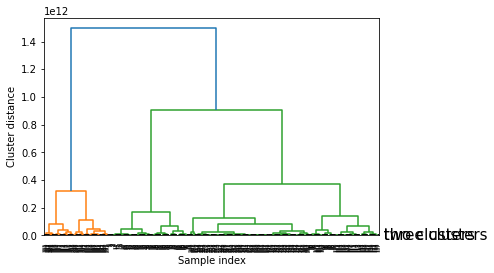

In [138]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
#ax.set_xticklabels(rotation=90)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Feature 1')

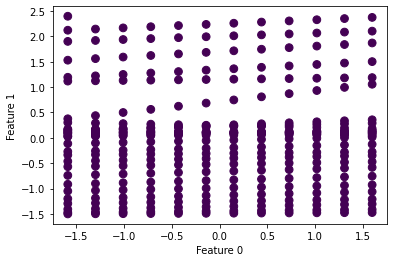

In [139]:
from sklearn.cluster import DBSCAN

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")